## Generating Synthetic data for a heathcare dataset "obesity" with the models TabDDPM and TabSyn

Link of the dataset is "https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition"

#### Synthetic Data:
Synthetic data refers 
to artificially generated data that replicates the statistical properties and characteristics of real-worl 
da.4] It is generated by algorithms and mathematical models, often based on machine learni g
techniques, to mimic the patterns and distributions found in real d.

#### Need for Synthetic Data:
- To investigate hypothetical situations or exploring future instances where 
current dat is unavailable.
- To prevent privacy concerns and legal regulations, specially in healthcare industry.
- To save time and cost to gather the dataset.
#### Objective of Project:
- Generating synthetic data for real world dataset.
- Comparing generated dataset by using two models i.e. TabDDPM and TabSyn.
- Evaluating the generated dataset on the basis of Stastical Methods (Mean, std, Distribution, % of categories etc.), Machine Learning Efficiency (TSTR), Privacy measures.
#### GitHub Repository:
- We have used "https://github.com/amazon-science/tabsyn" Repository for the source code for both the Models "TabDDPM" and "TabSyn".
#### Datasets Used:
- Obesity: The dataset contains data for estimating obesity levels in individuals from Mexico, Peru, and Colombia, based on their dietary habits and physical condition. It includes a categorical target variable labeled ”NObesity,” with categories such as ”Sufficient Weight,” ”Normal Weight", ”Overweight Level I”, ”Overweight Level II”, ”Obesity Type I”, ”Obesity Type II", and ”Obesity Type III”. ("https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip").
- Diabetes : This dataset, known as the Diabetes Health Indicators Dataset, comprises healthcare statistics and lifestyle survey information, along with diagnoses of diabetes. The target variable for classification, ”Diabetes binary”, indicates whether a patient has diabetes, is pre-diabetic, or is healthy. ("https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators").

|Dataset| #Entries    | #Numerical                  |#Categorical|#Train|#Test|Task|
| ------------|------------------- | ----------------------------- |-------|-----|----|-----|
|  Obesity| 2111 |  8|9|1899|212|Categorical (MultiClass)|
|  Diabetes |253680                |  7              |15|228312|25368|Categorical (BinClass)|
ata

In [1]:
import torch

if torch.cuda.is_available():
    print("CUDA is available.")
else:
    print("CUDA is not available.")

CUDA is available.


### Cloning the GitHub Repository

In [65]:
# cloned the gitHub Repository
! git clone https://github.com/amazon-science/tabsyn

fatal: destination path 'tabsyn' already exists and is not an empty directory.


In [1]:
import os
current_dir=os.getcwd()

In [2]:
# adding the path to teh cloned repository
current_dir = os.path.join(current_dir, 'tabsyn')

In [3]:
%cd $current_dir

C:\Users\neetu\Documents\Untitled_Folder\tabsyn


C:\Users\neetu\anaconda3\envs\tab\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
!pip install dgl

DEPRECATION: xgbse 0.2.3 has a non-standard dependency specifier pandas>=1.0.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of xgbse or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [6]:
!pip install peft

DEPRECATION: xgbse 0.2.3 has a non-standard dependency specifier pandas>=1.0.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of xgbse or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [7]:
!pip install datasets

DEPRECATION: xgbse 0.2.3 has a non-standard dependency specifier pandas>=1.0.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of xgbse or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [8]:
!pip install torch_geometric

DEPRECATION: xgbse 0.2.3 has a non-standard dependency specifier pandas>=1.0.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of xgbse or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [9]:
# install other dependencies
!pip install -r requirements.txt

DEPRECATION: xgbse 0.2.3 has a non-standard dependency specifier pandas>=1.0.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of xgbse or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


## Using your own dataset

### Created a directory named "obesity" in data folder

In [74]:
# Create a directory for the dataset
#%cd $current_dir/data
%mkdir data\obesity

### Downloaded the obesity.csv file and uploaded it in obesity directory and then write a .json file (obesity.json) recording the metadata of the tabular, covering the following information:

In [75]:
import json

metadata = {
    "name": "obesity",
    "task_type": "multiclass",  # binclass or regression or multiclass
    "header": "infer",
    "column_names": None,
    "num_col_idx": [1,2,3,6,7,10,12,13],  # list of indices of numerical columns
    "cat_col_idx": [0,4,5,8,9,11,14,15],  # list of indices of categorical columns
    "target_col_idx": [16],  # list of indices of the target columns (for MLE)
    "file_type": "csv",
    "data_path": f"data/obesity/obesity.csv",
    "test_path": None,
}

##### After creating the .json file, saving it to the required path.

In [83]:
# Save the metadata as a JSON file
with open(f"Info/obesity.json", "w") as json_file:
    json.dump(metadata, json_file, indent=4)

In [7]:
#import json

In [8]:
#with open("data/Info/obesity.json", 'r') as json_file:
 #   data = json.load(json_file)

In [9]:
# Modify the data as needed
#data['task_type'] = 'multiclass'

# Write the updated data back to the JSON file
#with open("data/Info/obesity.json", 'w') as json_file:
 #   json.dump(data, json_file, indent=4)

In [11]:
!python download_dataset.py

Start processing dataset obesity from UCI.
Aready downloaded.


In [12]:
! python process_dataset.py

adult (32561, 15) (16281, 15) (32561, 15)
Numerical (32561, 6)
Categorical (32561, 8)
Processing and Saving adult Successfully!
adult
Total 48842
Train 32561
Test 16281
Num 6
Cat 9
default (27000, 24) (3000, 24) (30000, 24)
Numerical (27000, 14)
Categorical (27000, 9)
Processing and Saving default Successfully!
default
Total 30000
Train 27000
Test 3000
Num 14
Cat 10
shoppers (11097, 18) (1233, 18) (12330, 18)
Numerical (11097, 10)
Categorical (11097, 7)
Processing and Saving shoppers Successfully!
shoppers
Total 12330
Train 11097
Test 1233
Num 10
Cat 8
magic (17117, 11) (1902, 11) (19019, 11)
Numerical (17117, 10)
Categorical (17117, 0)
Processing and Saving magic Successfully!
magic
Total 19019
Train 17117
Test 1902
Num 10
Cat 1
beijing (37581, 12) (4176, 12) (41757, 12)
Numerical (37581, 6)
Categorical (37581, 5)
Processing and Saving beijing Successfully!
beijing
Total 41757
Train 37581
Test 4176
Num 7
Cat 5
news (35679, 48) (3965, 48) (39644, 48)
Numerical (35679, 45)
Categorical (

**Result** : 
- Preprocess the dataset and split it into training and testing datset with 90% training and 10% testing.

## Creating the .toml file in config directory for obesity dataset.

In [91]:
%%writefile C:/Users/neetu/Documents/Untitled_Folder/tabsyn/baselines/tabddpm/configs/obesity.toml
# Sample TOML file for obesity configuration

parent_dir = "configs/obesity"
model_save_path = "ckpt/obesity"
sample_save_path = "sampled/obesity"
real_data_path = "Data/obesity"

num_numerical_features = 8
model_type = "mlp"
task_type = "multiclass"  #changed from "binclass" to "multiclass"

[model_params]
num_classes = 7
is_y_cond = false

[model_params.rtdl_params]
d_layers = [
    1024,
    2048,
    2048,
    1024,
]
dropout = 0.0

[diffusion_params]
num_timesteps = 1000
gaussian_loss_type = "mse"

[train.main]
steps = 1000 #changed from 100000 to 100 for understanding
lr = 0.001809824563637657
weight_decay = 5e-4
batch_size = 4096

[train.T]
seed = 0
normalization = "quantile"
num_nan_policy = "mean"
cat_nan_policy = "__none__"
cat_min_frequency = "__none__"
cat_encoding = "__none__"
y_policy = "default"

[sample]
num_samples = 1899
batch_size = 1000
seed = 0

[eval.type]
eval_model = "mlp"
eval_type = "synthetic"

[eval.T]
seed = 0
normalization = "quantile"
num_nan_policy = "__none__"
cat_nan_policy = "__none__"
cat_min_frequency = "__none__"
cat_encoding = "one-hot"
y_policy = "default"

Writing C:/Users/neetu/Documents/Untitled_Folder/tabsyn/baselines/tabddpm/configs/obesity.toml


**Result** : 
- In obesity.toml file, we have set the epochs = 1000 for the TabDDPM model.

## Training the models 

In [14]:
# train Tabddpm model for "Obesity" dataset
!python main.py --dataname obesity --method tabddpm --mode train

START TRAINING
No NaNs in numerical features, skipping
38
{'num_classes': 7, 'is_y_cond': False, 'rtdl_params': {'d_layers': [1024, 2048, 2048, 1024], 'dropout': 0.0}, 'd_in': 38}
mlp
MLPDiffusion(
  (mlp): MLP(
    (blocks): ModuleList(
      (0): Block(
        (linear): Linear(in_features=1024, out_features=1024, bias=True)
        (activation): ReLU()
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): Block(
        (linear): Linear(in_features=1024, out_features=2048, bias=True)
        (activation): ReLU()
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (2): Block(
        (linear): Linear(in_features=2048, out_features=2048, bias=True)
        (activation): ReLU()
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (3): Block(
        (linear): Linear(in_features=2048, out_features=1024, bias=True)
        (activation): ReLU()
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
    (head): Linear(in_features=1024, out_feature

**Result** : 
- The model TabDDPM has been trained with "1000" epochs.

In [5]:
# train VAE first
!python main.py --dataname obesity --method vae --mode train

No NaNs in numerical features, skipping
self.category_embeddings.weight.shape=torch.Size([30, 4])
self.category_embeddings.weight.shape=torch.Size([30, 4])
epoch: 0, beta = 0.010000, Train MSE: 3.374275, Train CE:1.462701, Train KL:0.232250, Val MSE:3.163618, Val CE:1.413898, Train ACC:0.269440, Val ACC:0.269392
epoch: 1, beta = 0.010000, Train MSE: 3.234843, Train CE:1.398153, Train KL:0.241669, Val MSE:3.035307, Val CE:1.349423, Train ACC:0.288573, Val ACC:0.297170
epoch: 2, beta = 0.010000, Train MSE: 3.110249, Train CE:1.360415, Train KL:0.257416, Val MSE:2.899447, Val CE:1.332608, Train ACC:0.286642, Val ACC:0.301887
epoch: 3, beta = 0.010000, Train MSE: 2.996127, Train CE:1.331664, Train KL:0.277902, Val MSE:2.723629, Val CE:1.325110, Train ACC:0.292084, Val ACC:0.299266
epoch: 4, beta = 0.010000, Train MSE: 2.853608, Train CE:1.311494, Train KL:0.301703, Val MSE:2.629673, Val CE:1.312317, Train ACC:0.302732, Val ACC:0.311845
epoch: 5, beta = 0.010000, Train MSE: 2.731213, Train 


Epoch 1/1000: 100%|##########| 1/1 [00:10<00:00, 10.98s/it]

Epoch 2/1000: 100%|##########| 1/1 [00:10<00:00, 10.33s/it]

Epoch 3/1000: 100%|##########| 1/1 [00:11<00:00, 11.89s/it]

Epoch 4/1000: 100%|##########| 1/1 [00:09<00:00,  9.80s/it]

Epoch 5/1000: 100%|##########| 1/1 [00:10<00:00, 10.08s/it]

Epoch 6/1000: 100%|##########| 1/1 [00:09<00:00,  9.59s/it]

Epoch 7/1000: 100%|##########| 1/1 [00:09<00:00,  9.65s/it]

Epoch 8/1000: 100%|##########| 1/1 [00:09<00:00,  9.68s/it]

Epoch 9/1000: 100%|##########| 1/1 [00:09<00:00,  9.24s/it]

Epoch 10/1000: 100%|##########| 1/1 [00:09<00:00,  9.37s/it]

Epoch 11/1000: 100%|##########| 1/1 [00:08<00:00,  8.76s/it]

Epoch 12/1000: 100%|##########| 1/1 [00:08<00:00,  8.89s/it]

Epoch 13/1000: 100%|##########| 1/1 [00:08<00:00,  8.98s/it]

Epoch 14/1000: 100%|##########| 1/1 [00:09<00:00,  9.31s/it]

Epoch 15/1000: 100%|##########| 1/1 [00:08<00:00,  8.82s/it]

Epoch 16/1000: 100%|##########| 1/1 [00:09<00:00,  9.44s/it]

Epoch 17/1000: 1

**Results** : 
- The VAE model has been train with 1000 epochs.
- It took the longest time to get trained approx. 4 hrs.

In [6]:
# after the VAE is trained, train the diffusion model
!python main.py --dataname obesity --method tabsyn --mode train

C:\Users\neetu\Documents\Untitled_Folder\tabsyn\tabsyn/ckpt/obesity/
MLPDiffusion(
  (proj): Linear(in_features=68, out_features=1024, bias=True)
  (mlp): Sequential(
    (0): Linear(in_features=1024, out_features=2048, bias=True)
    (1): SiLU()
    (2): Linear(in_features=2048, out_features=2048, bias=True)
    (3): SiLU()
    (4): Linear(in_features=2048, out_features=1024, bias=True)
    (5): SiLU()
    (6): Linear(in_features=1024, out_features=68, bias=True)
  )
  (map_noise): PositionalEmbedding()
  (time_embed): Sequential(
    (0): Linear(in_features=1024, out_features=1024, bias=True)
    (1): SiLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
  )
)
the number of parameters 10633284
Time:  7054.83161854744



Epoch 1/1001: 100%|##########| 1/1 [00:05<00:00,  5.31s/it, Loss=1.04]

Epoch 2/1001: 100%|##########| 1/1 [00:05<00:00,  5.82s/it, Loss=1]

Epoch 3/1001: 100%|##########| 1/1 [00:05<00:00,  5.49s/it, Loss=1.01]

Epoch 4/1001: 100%|##########| 1/1 [00:05<00:00,  5.51s/it, Loss=1.19]

Epoch 5/1001: 100%|##########| 1/1 [00:05<00:00,  5.63s/it, Loss=0.964]

Epoch 6/1001: 100%|##########| 1/1 [00:05<00:00,  5.74s/it, Loss=0.973]

Epoch 7/1001: 100%|##########| 1/1 [00:05<00:00,  5.77s/it, Loss=0.951]

Epoch 8/1001: 100%|##########| 1/1 [00:05<00:00,  5.79s/it, Loss=0.952]

Epoch 9/1001: 100%|##########| 1/1 [00:05<00:00,  5.81s/it, Loss=0.943]

Epoch 10/1001: 100%|##########| 1/1 [00:05<00:00,  5.76s/it, Loss=0.935]

Epoch 11/1001: 100%|##########| 1/1 [00:05<00:00,  5.97s/it, Loss=0.941]

Epoch 12/1001: 100%|##########| 1/1 [00:05<00:00,  5.54s/it, Loss=0.934]

Epoch 13/1001: 100%|##########| 1/1 [00:05<00:00,  5.89s/it, Loss=0.912]

Epoch 14/1001: 100%|##########| 1/1 [00:05<00:00,  5.

**Results** : 
- Trained TabSyn model with 1001 epochs.
- Took around 2 hrs to get trained.

### Generating the synthetic data with both the Trained Models

In [7]:
#Generating the synthetic data by trained tabddpm model and saving it to synthetic/obesity/tabppm.csv
!python main.py --dataname obesity --method tabddpm --mode sample --save_path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\obesity\tabddpm.csv

START SAMPLING
No NaNs in numerical features, skipping
mlp
torch.Size([1000, 30])
Sample timestep  999
Sample timestep  998
Sample timestep  997
Sample timestep  996
Sample timestep  995
Sample timestep  994
Sample timestep  993
Sample timestep  992
Sample timestep  991
Sample timestep  990
Sample timestep  989
Sample timestep  988
Sample timestep  987
Sample timestep  986
Sample timestep  985
Sample timestep  984
Sample timestep  983
Sample timestep  982
Sample timestep  981
Sample timestep  980
Sample timestep  979
Sample timestep  978
Sample timestep  977
Sample timestep  976
Sample timestep  975
Sample timestep  974
Sample timestep  973
Sample timestep  972
Sample timestep  971
Sample timestep  970
Sample timestep  969
Sample timestep  968
Sample timestep  967
Sample timestep  966
Sample timestep  965
Sample timestep  964
Sample timestep  963
Sample timestep  962
Sample timestep  961
Sample timestep  960
Sample timestep  959
Sample timestep  958
Sample timestep  957
Sample timestep

**Result** : 
- The generated data has been stored in synthetic folder with a path tabsyn\synthetic\obesity\tabddpm.csv

In [8]:
# Generating synthetic data by trained tabsyn model and saving it to synthetic/obesity/tabsyn.csv
!python main.py --dataname obesity --method tabsyn --mode sample --save_path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\obesity\tabsyn.csv

No NaNs in numerical features, skipping
(1899, 9)
Time: 1.0352258682250977
Saving sampled data to C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\obesity\tabsyn.csv


## Evaluation

### Stastical Evaluation

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Read the real and synthetic datasets 
real_obesity = pd.read_csv(r'C:\Users\neetu\Documents\Untitled_Folder\tabsyn\data\obesity\train.csv')
syn_obesity_tabddpm = pd.read_csv(r'C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\obesity\tabddpm.csv')
syn_obesity_tabsyn = pd.read_csv(r'C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\obesity\tabsyn.csv')

In [12]:
real_obesity.head()

Gender        Age    Height     Weight family_history_with_overweight FAVC  \
0  Female  31.255587  1.693080  71.927376                            yes  yes   
1  Female  18.850466  1.550053  72.951800                            yes   no   
2    Male  22.975527  1.701986  95.000000                            yes  yes   
3  Female  47.283375  1.643786  81.978745                            yes  yes   
4  Female  33.732716  1.679725  74.885220                            yes  yes   

       FCVC       NCP       CAEC SMOKE      CH2O SCC       FAF       TUE  \
0  2.615788  3.000000  Sometimes    no  1.771781  no  0.759422  0.686529   
1  3.000000  3.000974  Sometimes    no  2.000000  no  2.274248  1.000000   
2  2.000000  3.000000  Sometimes    no  2.021270  no  1.814869  1.066603   
3  2.037585  1.418985  Sometimes    no  1.827351  no  0.000000  0.000000   
4  3.000000  1.137150  Sometimes    no  1.000695  no  0.261274  0.000000   

        CALC                 MTRANS           NObeyesdad  
0  Sometimes             Automobile   Overweight_Level_I  
1  Sometimes  Public_Transportation  Overweight_Level_II  
2         no  Public_Transportation       Obesity_Type_I  
3         no             Automobile       Obesity_Type_I  
4  Sometimes             Automobile   Overweight_Level_I

In [13]:
syn_obesity_tabddpm.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  32.313446  1.711795   99.686660                            yes   
1    Male  23.673107  1.707557   80.008470                            yes   
2  Female  20.000000  1.700660  131.650160                            yes   
3  Female  21.085073  1.555270   55.262302                             no   
4  Female  19.115990  1.516224   41.217236                             no   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.686382  2.160955   Sometimes    no  1.000000  no  1.379220   
1  yes  2.000000  1.505212   Sometimes    no  1.849078  no  1.580011   
2  yes  3.000000  3.000000   Sometimes    no  1.000000  no  1.992408   
3   no  3.000000  3.000000      Always    no  2.475730  no  2.000000   
4   no  2.740348  1.570045  Frequently    no  2.000000  no  1.000000   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.000000         no  Public_Transportation      Obesity_Type_II  
1  0.890932  Sometimes  Public_Transportation  Overweight_Level_II  
2  0.986364  Sometimes  Public_Transportation     Obesity_Type_III  
3  0.000000         no                Walking        Normal_Weight  
4  0.659193  Sometimes  Public_Transportation  Insufficient_Weight

In [14]:
syn_obesity_tabsyn.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  24.997849  1.742456   82.292120                            yes   
1    Male  22.012598  1.720632   94.279076                            yes   
2    Male  31.135693  1.769145  113.761444                            yes   
3    Male  21.482363  1.707618   92.399440                            yes   
4  Female  25.044033  1.654673  109.031770                            yes   

  FAVC      FCVC       NCP       CAEC SMOKE      CH2O SCC      FAF       TUE  \
0  yes  2.000000  2.107417  Sometimes    no  2.020784  no  1.90156  0.000000   
1  yes  2.000000  3.000000  Sometimes    no  2.000000  no  2.00000  1.000000   
2  yes  2.370559  3.000000  Sometimes    no  2.000000  no  0.00000  0.000000   
3  yes  2.000000  2.511434  Sometimes    no  2.410407  no  0.89047  1.000000   
4  yes  3.000000  3.000000  Sometimes    no  2.991589  no  0.00000  0.300893   

        CALC                 MTRANS           NObeyesdad  
0  Sometimes             Automobile  Overweight_Level_II  
1         no  Public_Transportation       Obesity_Type_I  
2  Sometimes             Automobile      Obesity_Type_II  
3         no  Public_Transportation       Obesity_Type_I  
4  Sometimes  Public_Transportation     Obesity_Type_III

### Descriptive Statistics

In [16]:
# Comparing the mean of each feature of three datasets
real_obesity_stats = real_obesity.describe().loc[['mean']].transpose()
syn_obesity_tabddpm_stats = syn_obesity_tabddpm.describe().loc[['mean']].transpose()
syn_obesity_tabsyn_stats = syn_obesity_tabsyn.describe().loc[['mean']].transpose()

In [17]:
# Concatenate the statistics for comparison
stats_comparison = pd.concat([real_obesity_stats, syn_obesity_tabddpm_stats, syn_obesity_tabsyn_stats], axis=1)
stats_comparison.columns = ['Real_mean', 'Synthetic_Tabddpm_mean','Syntehtic_Tabsyn_mean']
print(stats_comparison)

        Real_mean  Synthetic_Tabddpm_mean  Syntehtic_Tabsyn_mean
Age     24.342083               23.993099              23.853972
Height   1.701805                1.709579               1.704416
Weight  86.497866               87.240934              85.792685
FCVC     2.417700                2.403885               2.435528
NCP      2.690054                2.749151               2.701410
CH2O     2.004732                2.026125               1.994883
FAF      1.016590                1.019952               0.999754
TUE      0.655368                0.678576               0.703921


**RESULT** :  The comparison of "Mean" of each Numerical variable in Real data and synthetic data generated by TabDDPM ad TabSyn depicts that :
- Overall synthetic data generated by TabDDPM is very similar to the real data for all variables
- There is no significant difference between the synthetic data generated by TabDDPM and TabSyn

In [26]:
# Comparing the std of each feature of three datasets
real_obesity_stats = real_obesity.describe().loc[['std']].transpose()
syn_obesity_tabddpm_stats = syn_obesity_tabddpm.describe().loc[['std']].transpose()
syn_obesity_tabsyn_stats = syn_obesity_tabsyn.describe().loc[['std']].transpose()

In [27]:
# Concatenate the statistics for comparison
stats_comparison = pd.concat([real_obesity_stats, syn_obesity_tabddpm_stats, syn_obesity_tabsyn_stats], axis=1)
stats_comparison.columns = ['Real_std', 'Synthetic_Tabddpm_std','Syntehtic_Tabsyn_std']
print(stats_comparison)

         Real_std  Synthetic_Tabddpm_std  Syntehtic_Tabsyn_std
Age      6.412587               6.323540              5.522943
Height   0.093805               0.093804              0.086636
Weight  26.309734              26.658567             25.369378
FCVC     0.531701               0.542297              0.513738
NCP      0.777778               0.721151              0.727058
CH2O     0.614679               0.582463              0.569276
FAF      0.849203               0.835308              0.787386
TUE      0.611210               0.590614              0.587498


**Results** : The Comparison of "std" of each Numerical Variable in Real and synthetic data generated by TabDDPM and TabSyn
- Both are performing similar whereas, in some variables TabDDPM is performing better

#### One Way ANOVA Test for Real dataset and TabDDPM and TabSyn generated dataset.

##### ANOVA Test:
- **Null Hypothesis(H0)**: There is **no difference** in the mean values of the variables between the two datasets.
- **Alternative Hypothesis(H1)**): There s a **difference** in  the mean values of the variables between the two datasets
- If p-value < significance value, **reject** H0 and  conclude that there are significant differences between themean values.
- If p-value > significance value, **do not reject** the H0 and conclude that there is no difference between the mean values.


In [11]:
from scipy.stats import f_oneway
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(real_obesity[obesity_num], syn_obesity_tabddpm[obesity_num])
print("f_statistics: ",f_statistic)
print("p_value: ",p_value)

f_statistics:  [2.8514896  6.52002184 0.74741384 0.62830398 5.89528481 1.21199747
 0.01512877 1.41584197]
p_value:  [0.09137145 0.01070543 0.38735089 0.42802764 0.01522765 0.27100669
 0.90211435 0.23416342]


In [13]:
f_statistic, p_value = f_oneway(real_obesity[obesity_num], syn_obesity_tabsyn[obesity_num])
print("f_statistics: ",f_statistic)
print("p_value: ",p_value)

f_statistics:  [6.31688825 0.79382226 0.70693944 1.10426428 0.21605162 0.26245545
 0.40136302 6.22863345]
p_value:  [0.01200042 0.37300332 0.40051468 0.29339907 0.64209166 0.60846803
 0.52642434 0.0126122 ]


**Results** : 
- For Real and TabDDPM, there are 3 varaibles with p-value less than 0.05, implies rejct H0, hence there are significant difference between the mean values.
- Whereas, for Real and TabSyn, there are only 2 variables with p-values less than 0.05.
- Doesnot provide any specific implication.

##### Comparing the percentages of each category of each "categorical variable" in real and syntehtic data

In [25]:
import pandas as pd
cat_obesity = real_obesity.select_dtypes(include=['object']).columns
# Iterate through each categorical column
for column in cat_obesity:
    # Calculate frequencies in the datasets
    freq_real_obesity = real_obesity[column].value_counts()
    freq_syn_obesity_tabddpm = syn_obesity_tabddpm[column].value_counts()
    freq_syn_obesity_tabsyn = syn_obesity_tabsyn[column].value_counts()
    
    # Calculate percentages in the datasets
    perc_real_obesity = freq_real_obesity / len(real_obesity) * 100
    perc_syn_obesity_tabddpm = freq_syn_obesity_tabddpm / len(syn_obesity_tabddpm) * 100
    perc_syn_obesity_tabsyn = freq_syn_obesity_tabsyn / len(syn_obesity_tabsyn) * 100
    
    # Combine the percentages into a single DataFrame for comparison
    comparison_obesity = pd.concat([perc_real_obesity, perc_syn_obesity_tabddpm, perc_syn_obesity_tabsyn], axis=1, keys=[' real_obesity', 'Percentage syn_tabddpm', 'Percentage syn_tabsyn'])
    
    # Print the comparison
    print(f"Comparison of {column}:")
    print(comparison_obesity)
    print()


Comparison of Gender:
        % real_obesity  % syn_tabddpm  % syn_tabsyn
Male           50.7109      52.659294     50.974197
Female         49.2891      47.340706     49.025803

Comparison of family_history_with_overweight:
     % real_obesity  % syn_tabddpm  % syn_tabsyn
yes       81.832543      84.096893      82.09584
no        18.167457      15.903107      17.90416

Comparison of FAVC:
     % real_obesity  % syn_tabddpm  % syn_tabsyn
yes       88.362296      91.837809     89.468141
no        11.637704       8.162191     10.531859

Comparison of CAEC:
            % real_obesity  % syn_tabddpm  % syn_tabsyn
Sometimes        83.622959      87.467088     83.201685
Frequently       11.427067       9.531332     13.586098
no                2.474987       1.316482      1.316482
Always            2.474987       1.685097      1.895735

Comparison of SMOKE:
     % real_obesity  % syn_tabddpm  % syn_tabsyn
no         97.73565      98.788836     98.841496
yes         2.26435       1.211164     

**Results** : After comparing the % of categorical variables in real and synthetic data generated by TabDDPM and TabSyn
- Tabsyn generated data is comparatively better than TabDDpm.
- Hence, It seems Tabsyn is able to generate similar categorical data as real categorical variables.

### Visualization

#### Categorical Variables (BAR GRAPH)

In [7]:
obesity_num = ['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']
obesity_cat = ['Gender','family_history_with_overweight','FAVC','CAEC', 'SMOKE','SCC','CALC','MTRANS','NObeyesdad']

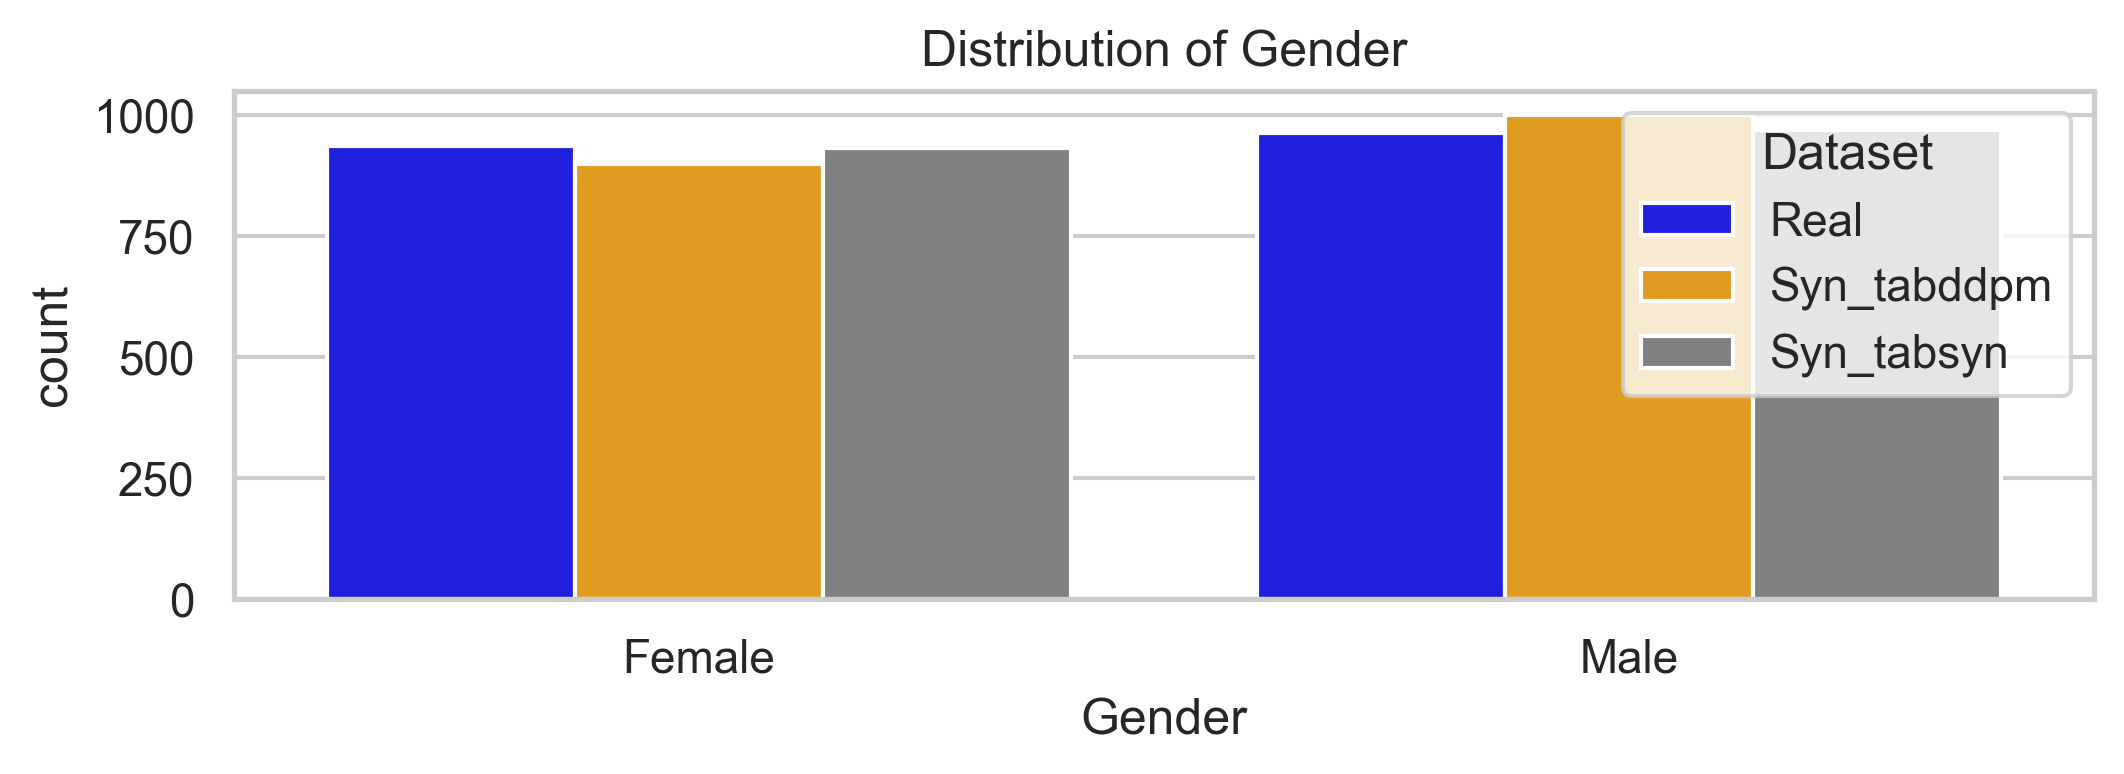

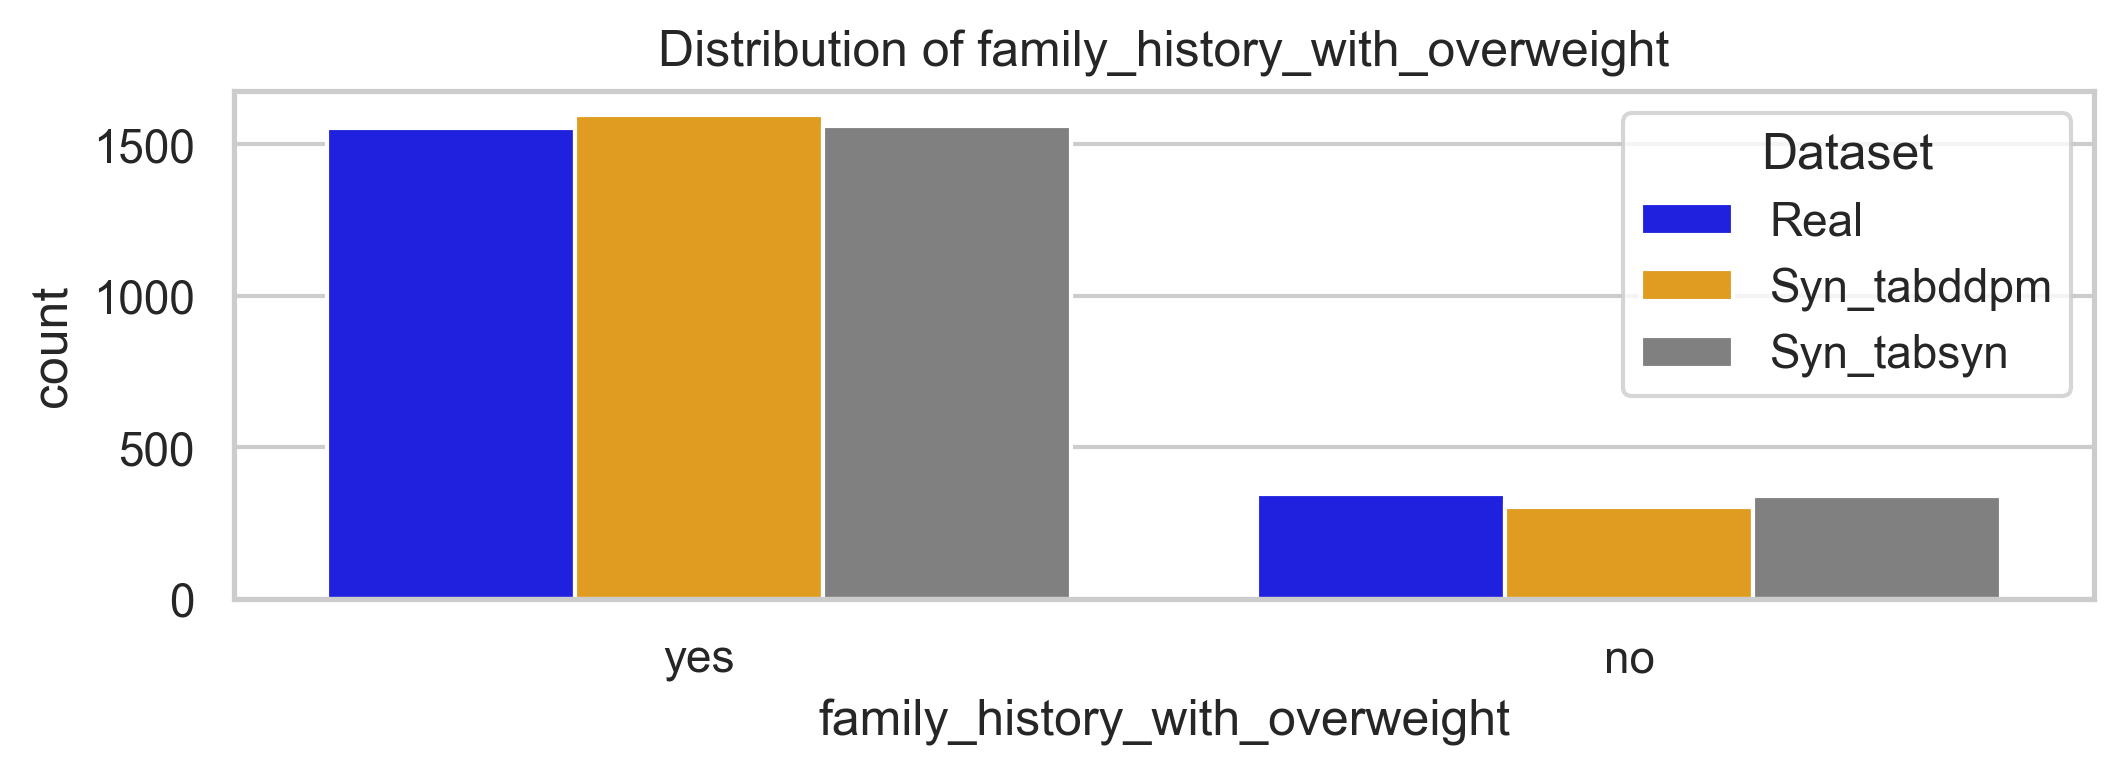

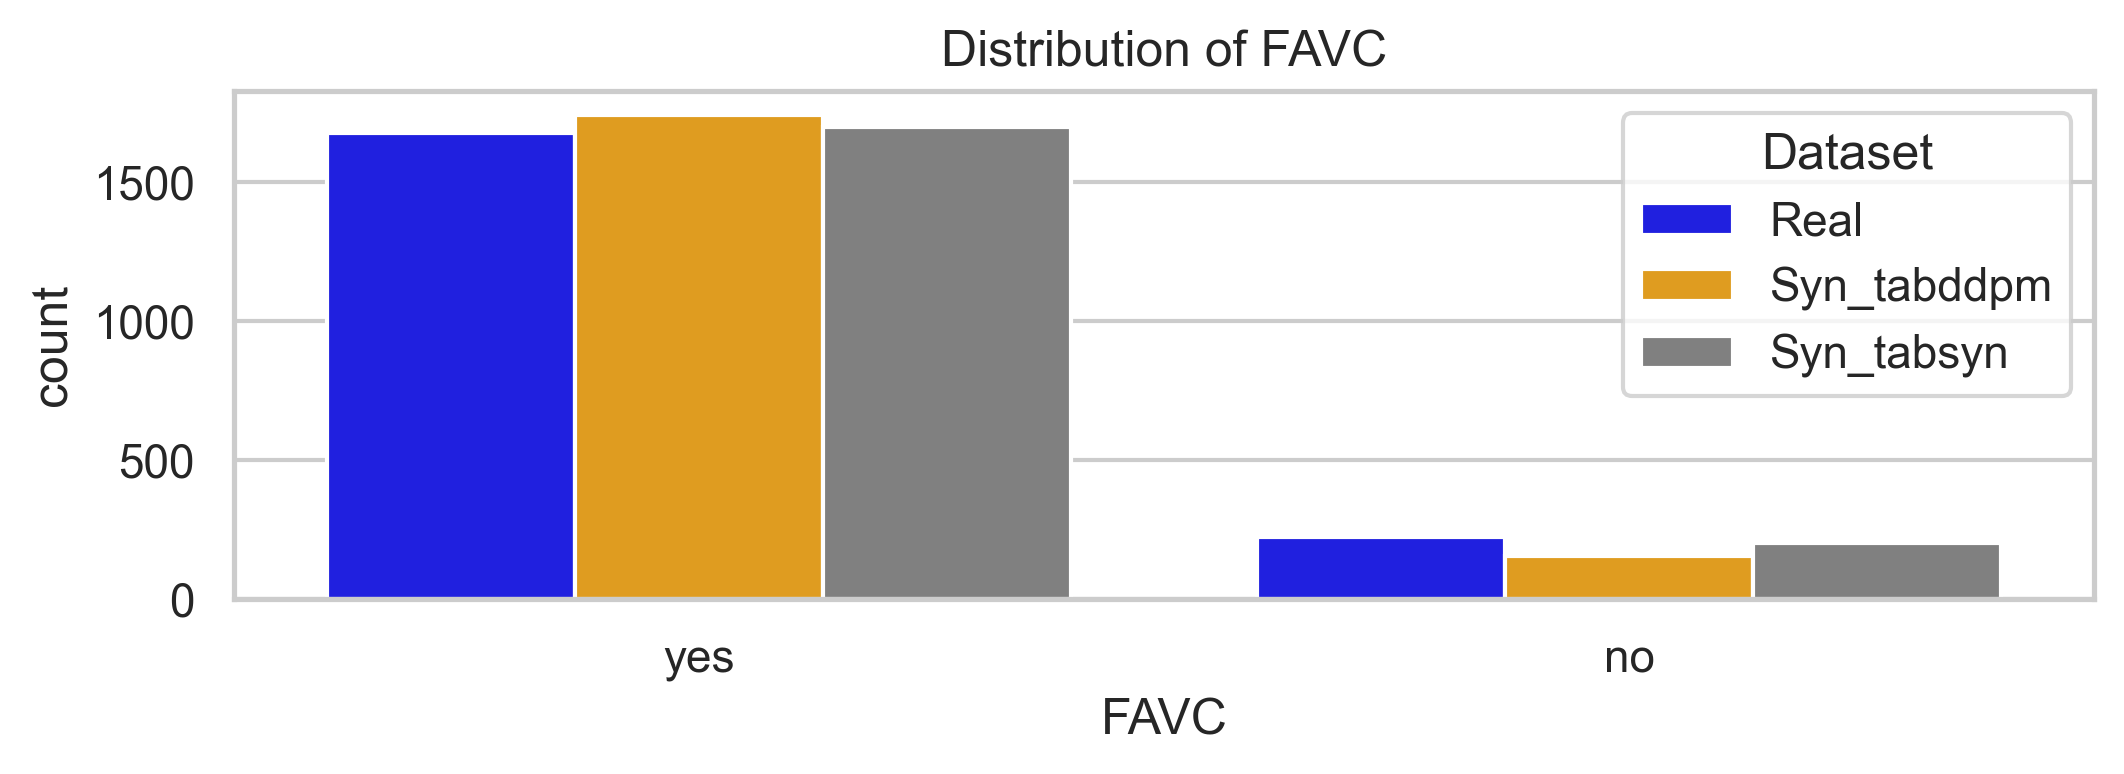

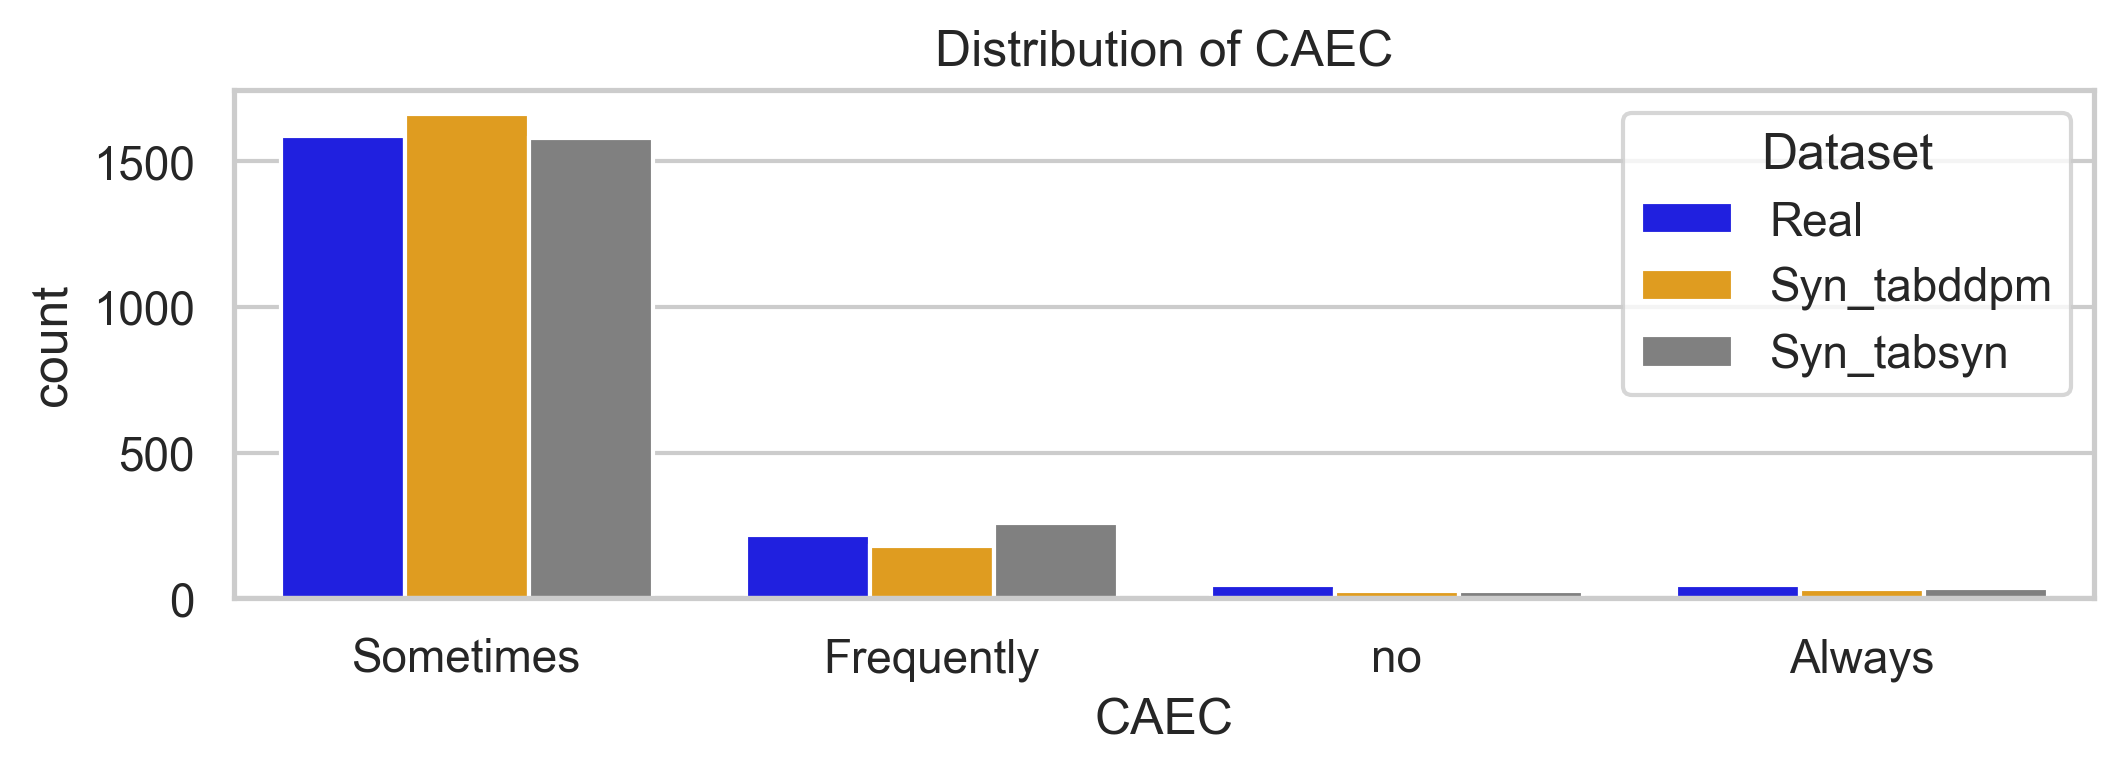

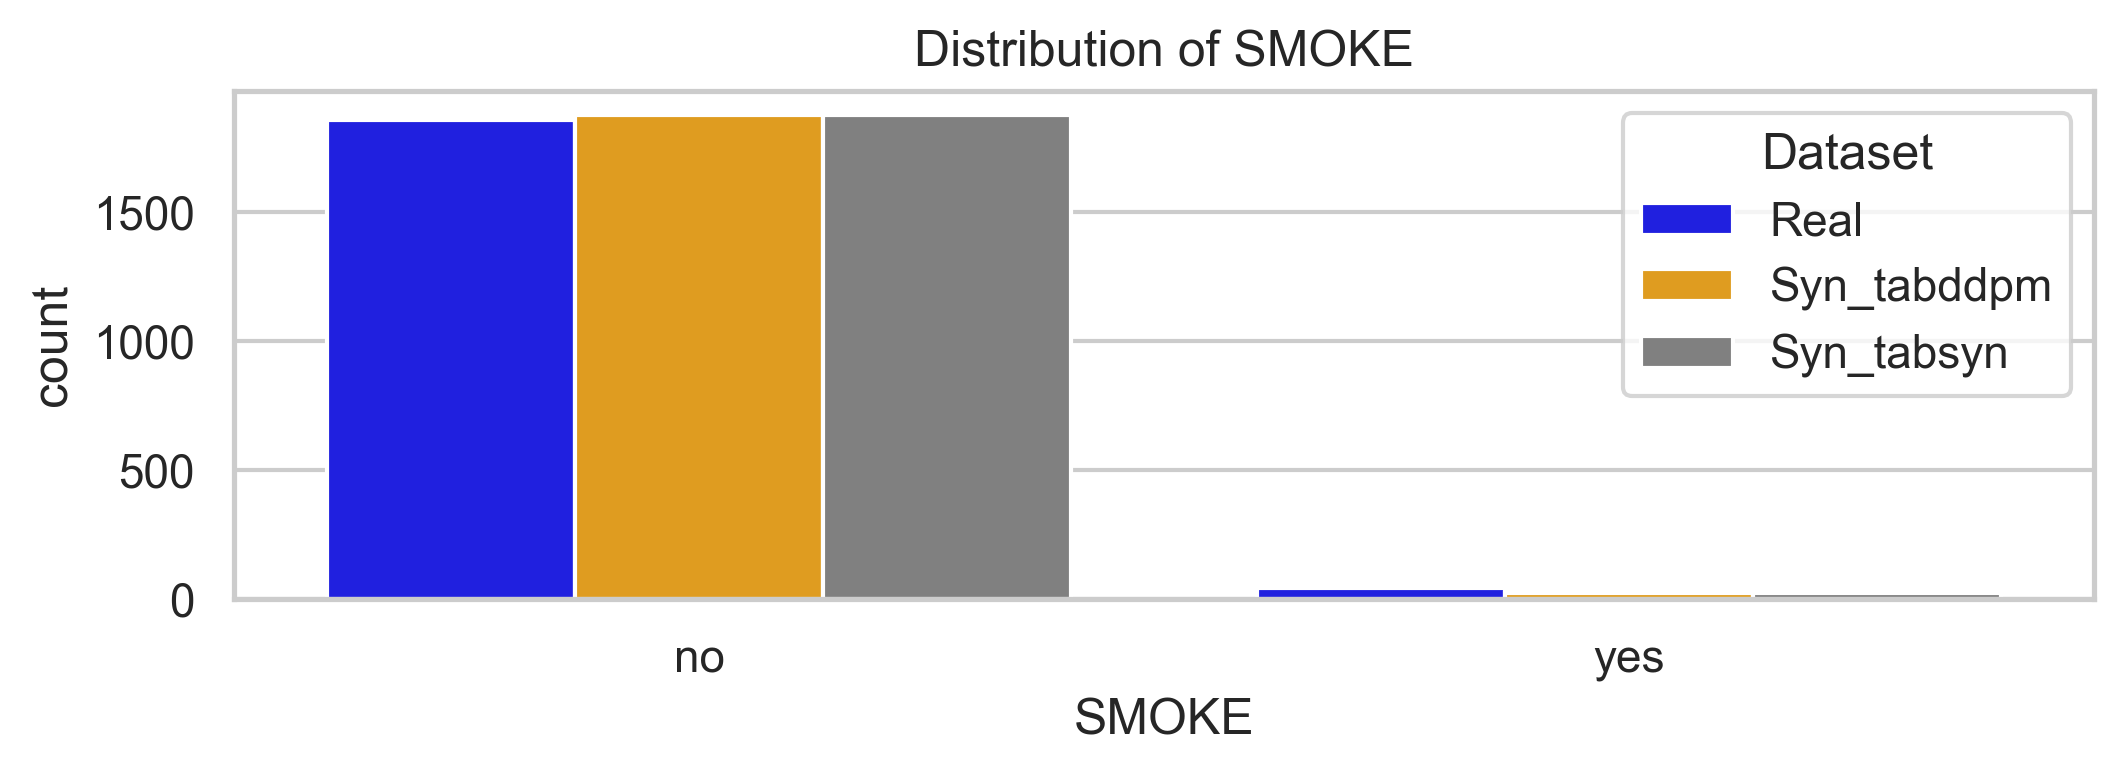

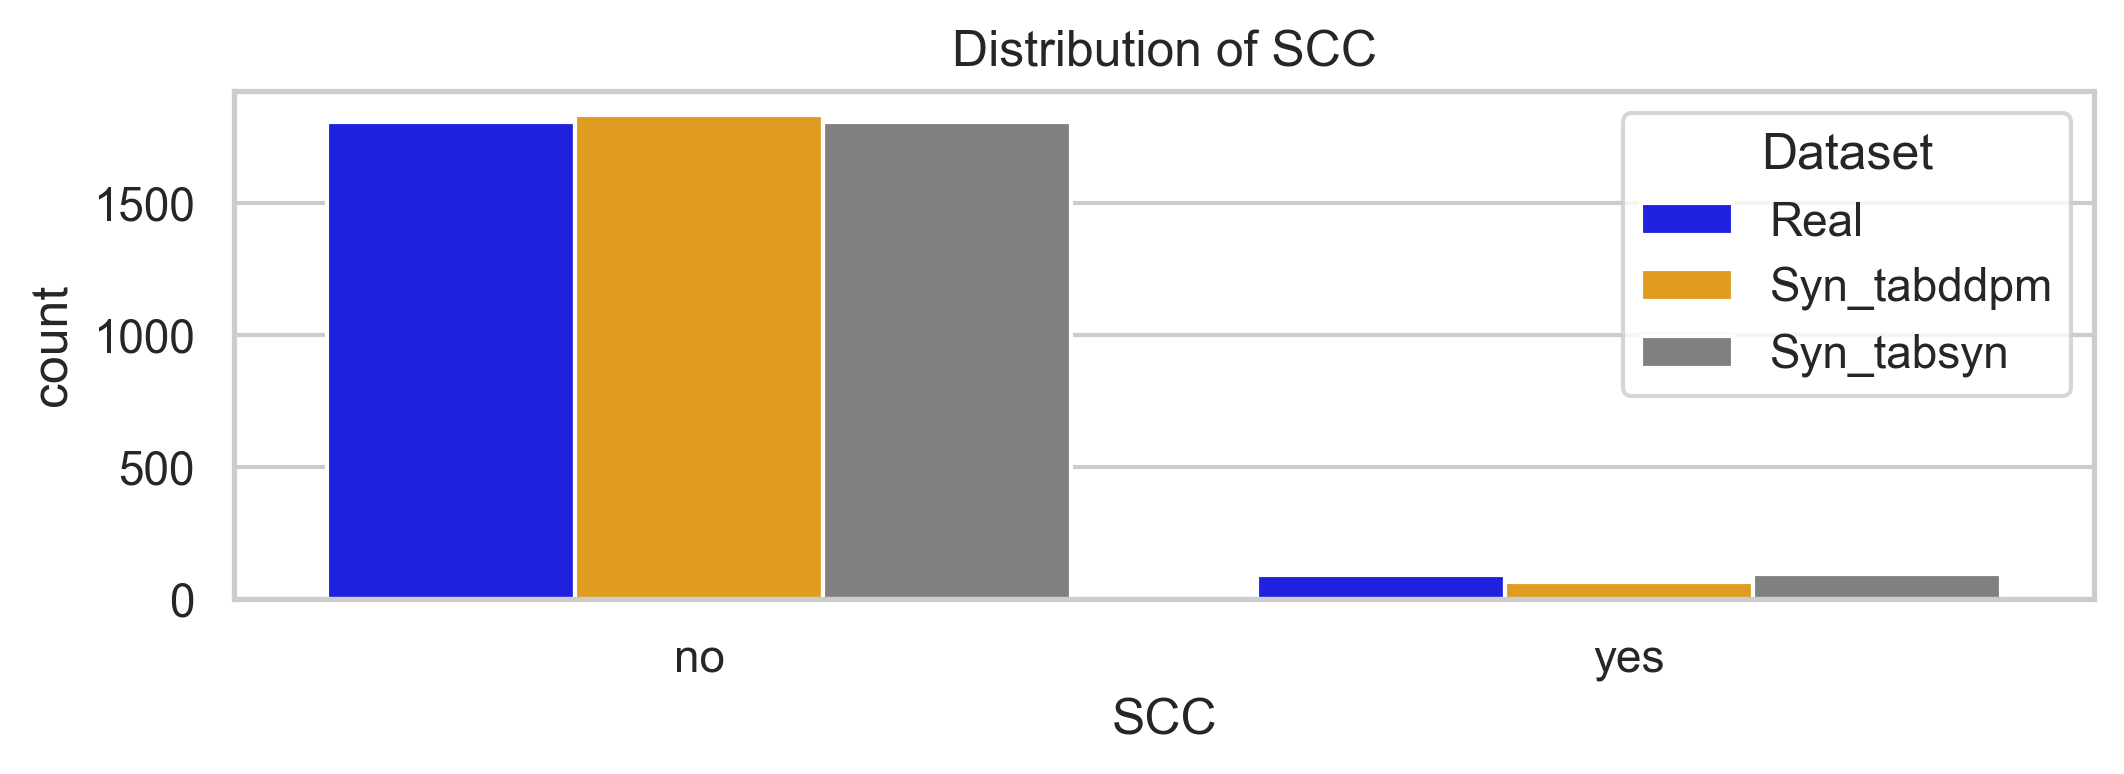

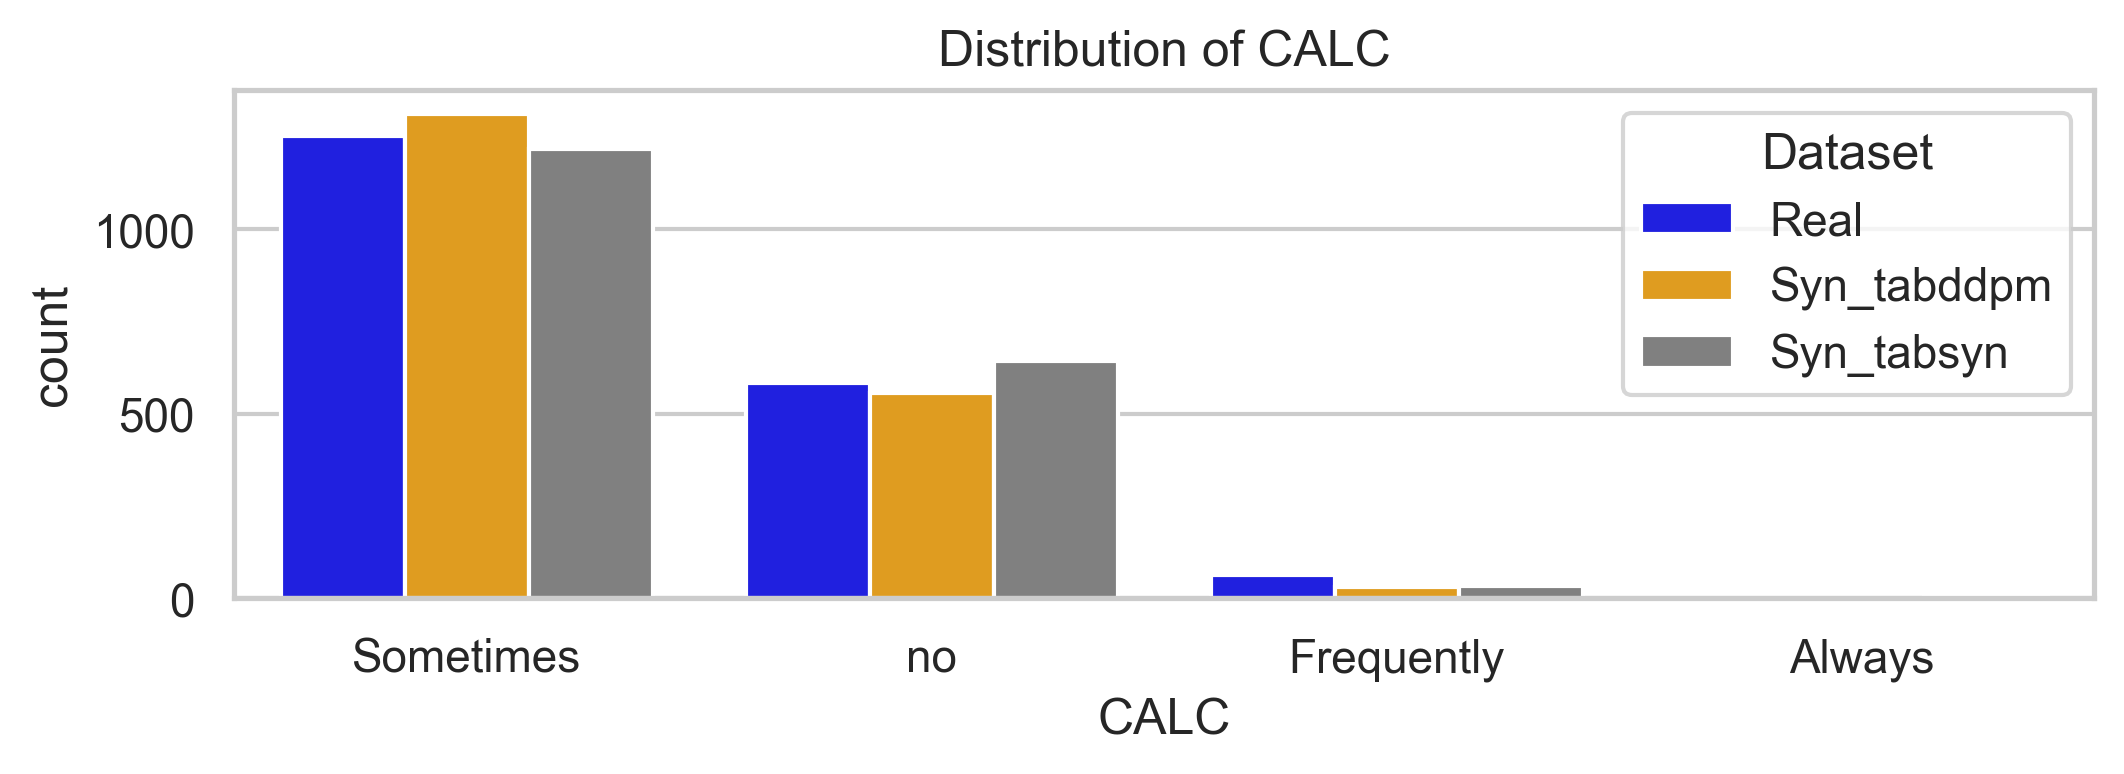

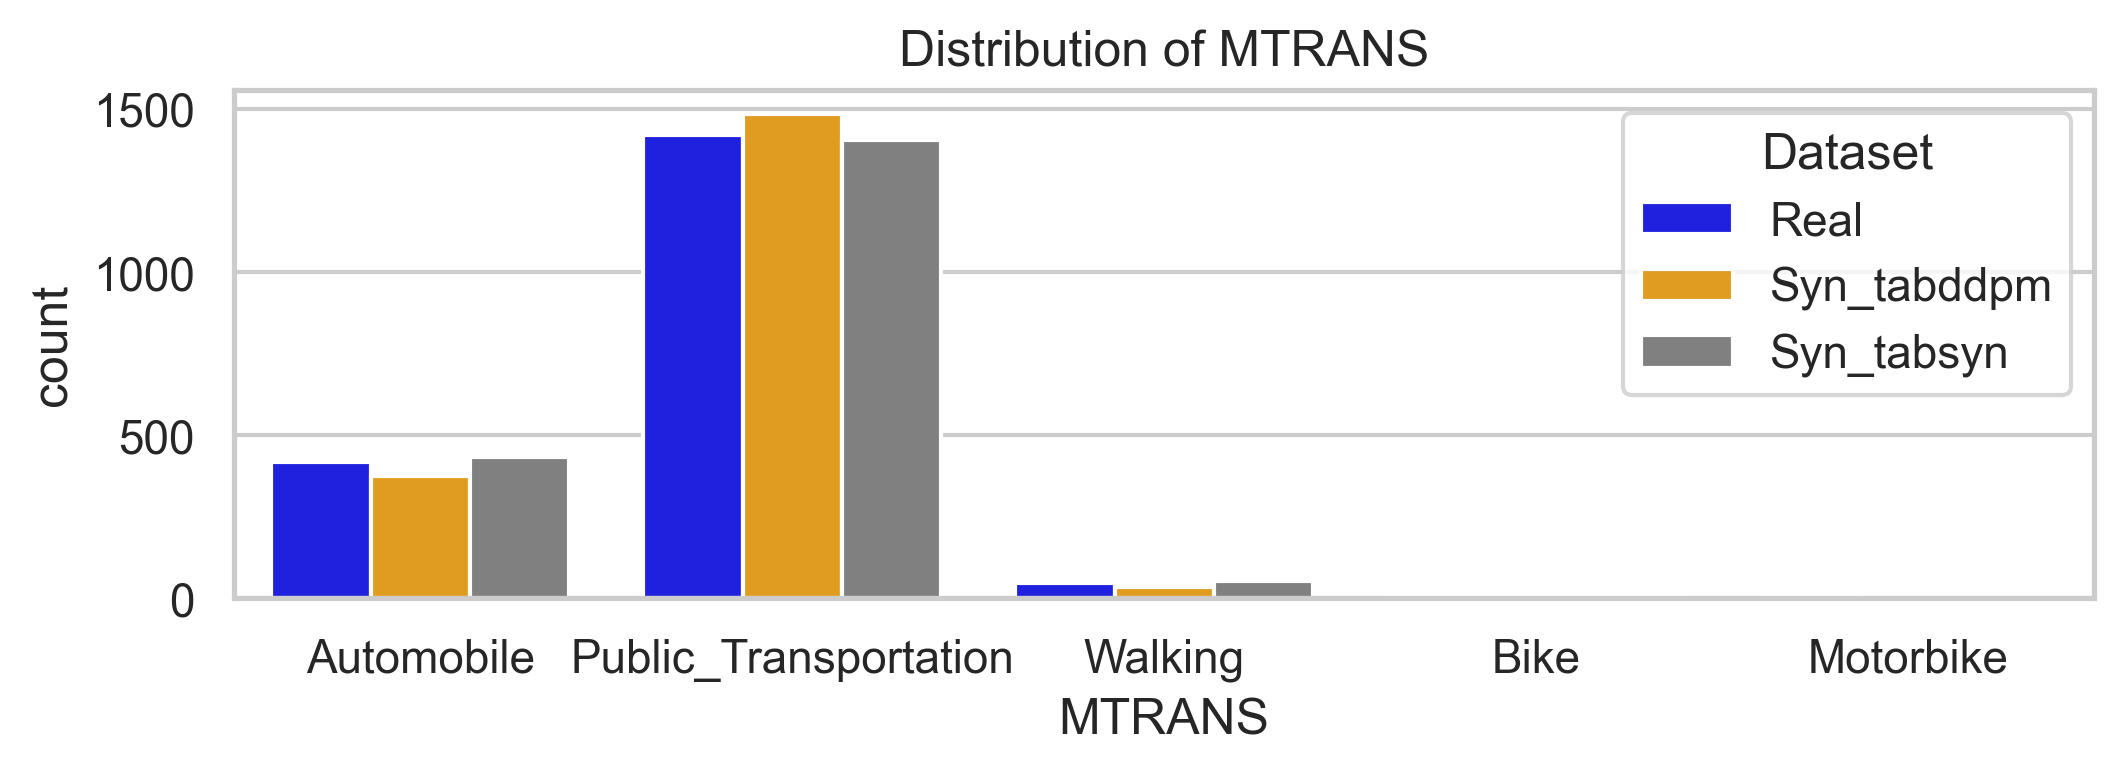

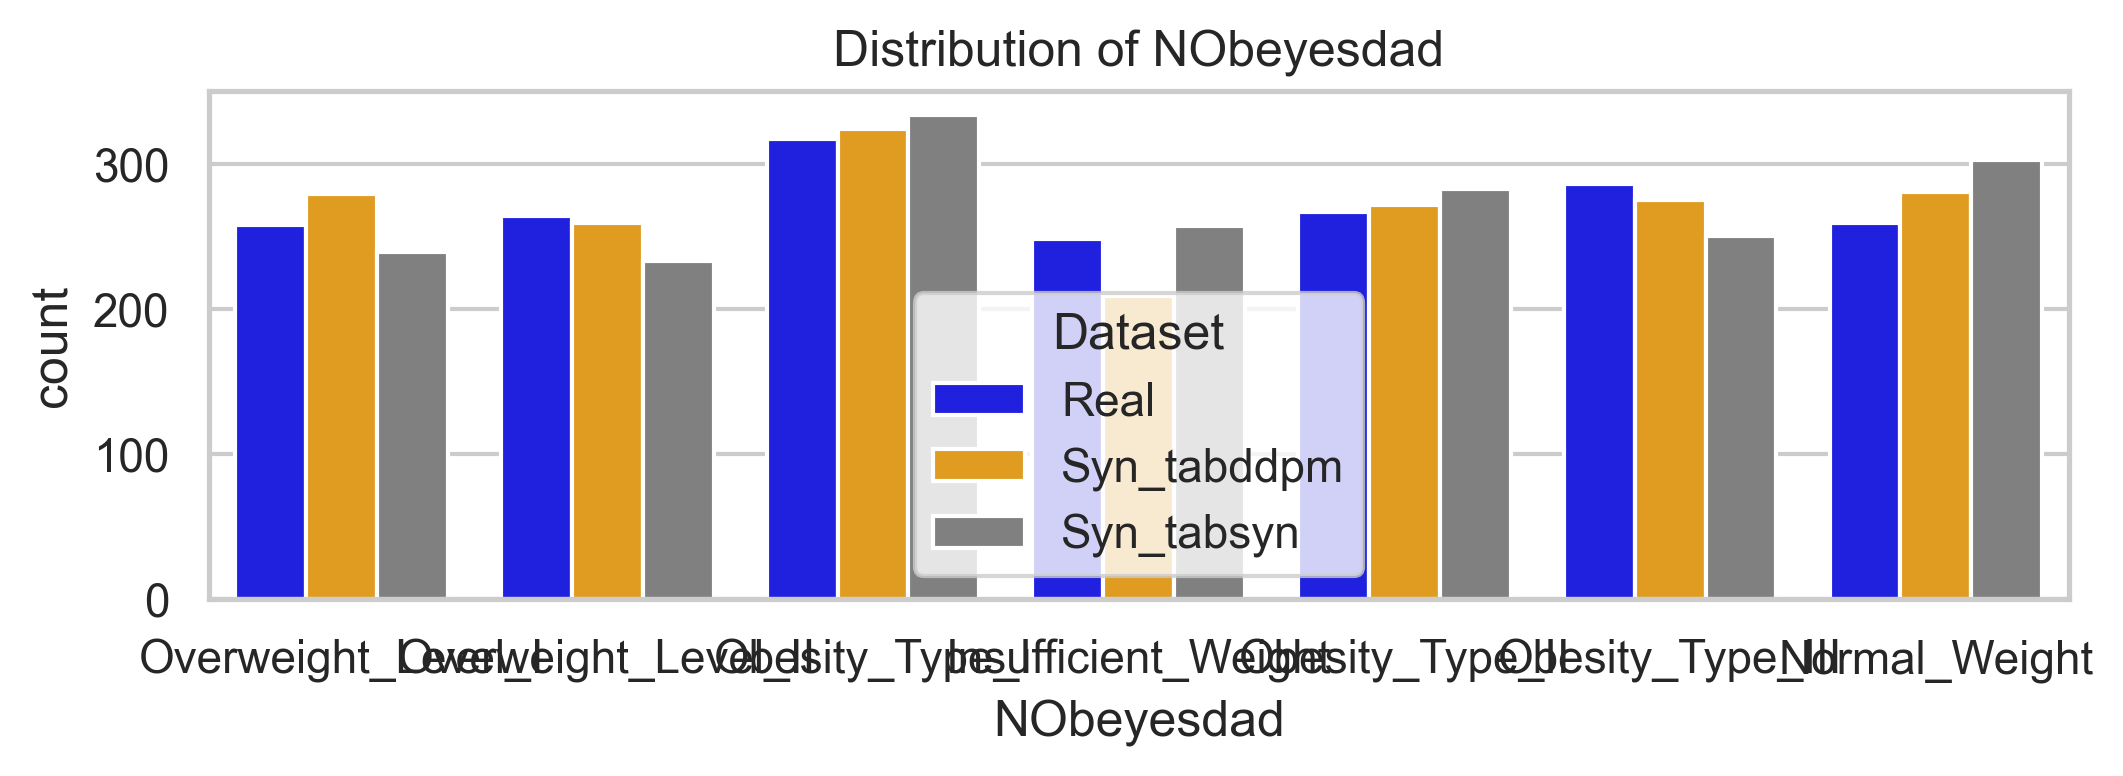

In [25]:
# Compare the "categorical variables" of the real dataset, synthetic dataset generated by Tabddpm and synthetic dataset generated by Tabsyn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Concatenate the datasets with an additional 'dataset' column
real_obesity['dataset'] = 'Real'
syn_obesity_tabddpm['dataset'] = 'Syn_tabddpm'
syn_obesity_tabsyn['dataset'] = 'Syn_tabsyn'
combined_obesity = pd.concat([real_obesity, syn_obesity_tabddpm, syn_obesity_tabsyn])

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a matrix of bar graphs for each categorical variable
for column in obesity_cat:
    plt.figure(figsize=(8,2.2),dpi=300)
    
    # Create a countplot for each categorical variable with different colors for real and synthetic
    sns.countplot(x=column, data=combined_obesity, hue='dataset', palette=['blue', 'orange','grey'])
    
    plt.title(f'Distribution of {column}')
    plt.legend(title='Dataset')
    if column == "Gender": 
        plt.savefig("bar_graph.png",dpi = 300)
    plt.show()
    

**Results** : Through Visualization we can clearly depicts that Tabsyn synthesize better categorical variables.

#### Numerical Variables (Distribution Charts)

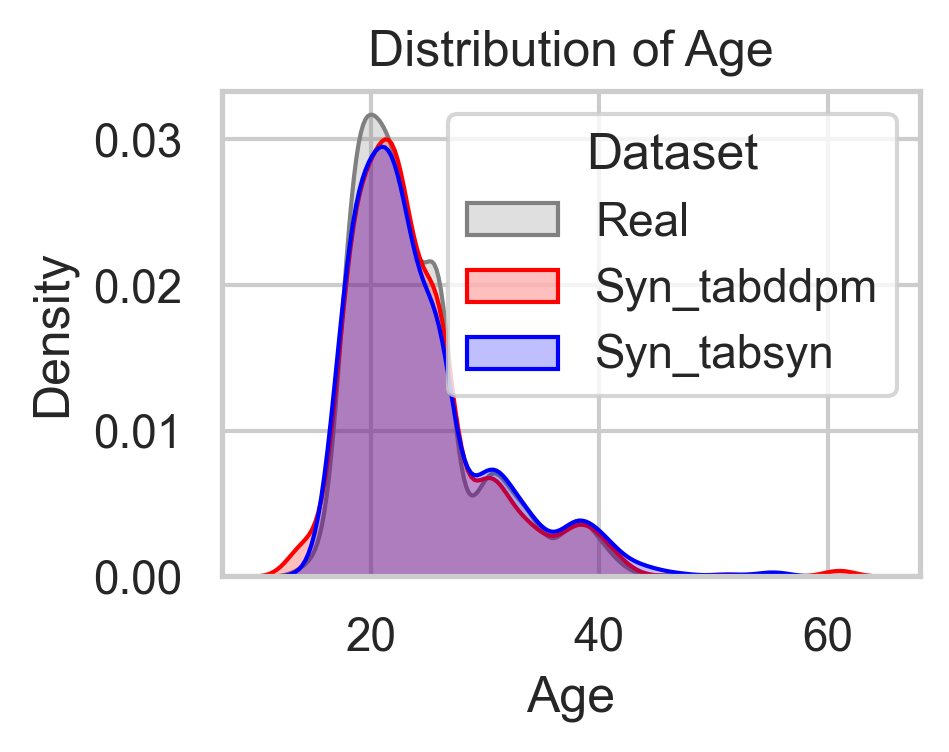

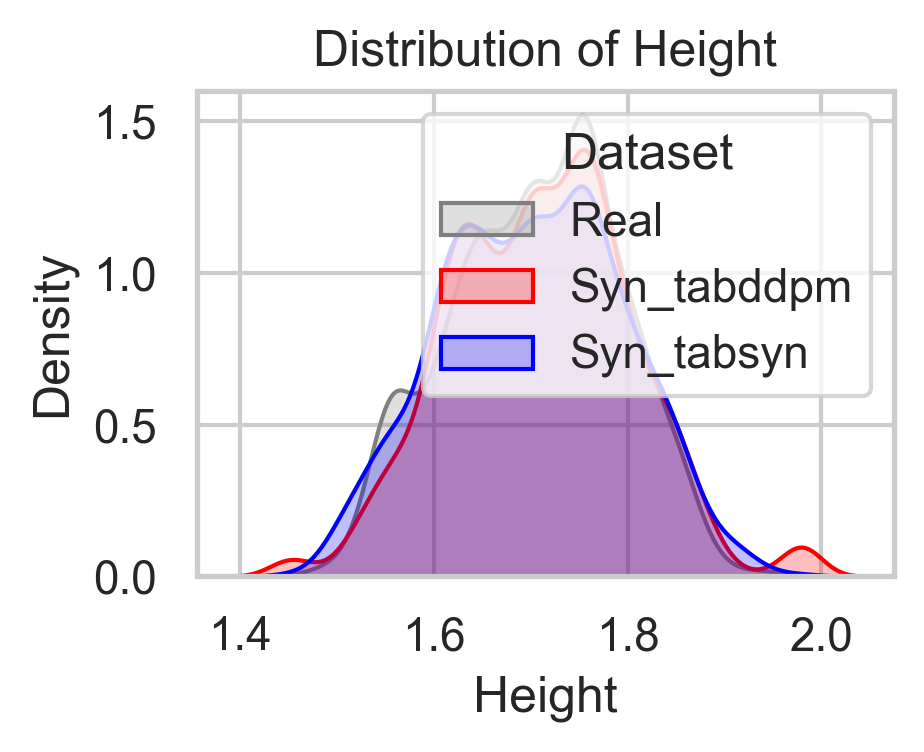

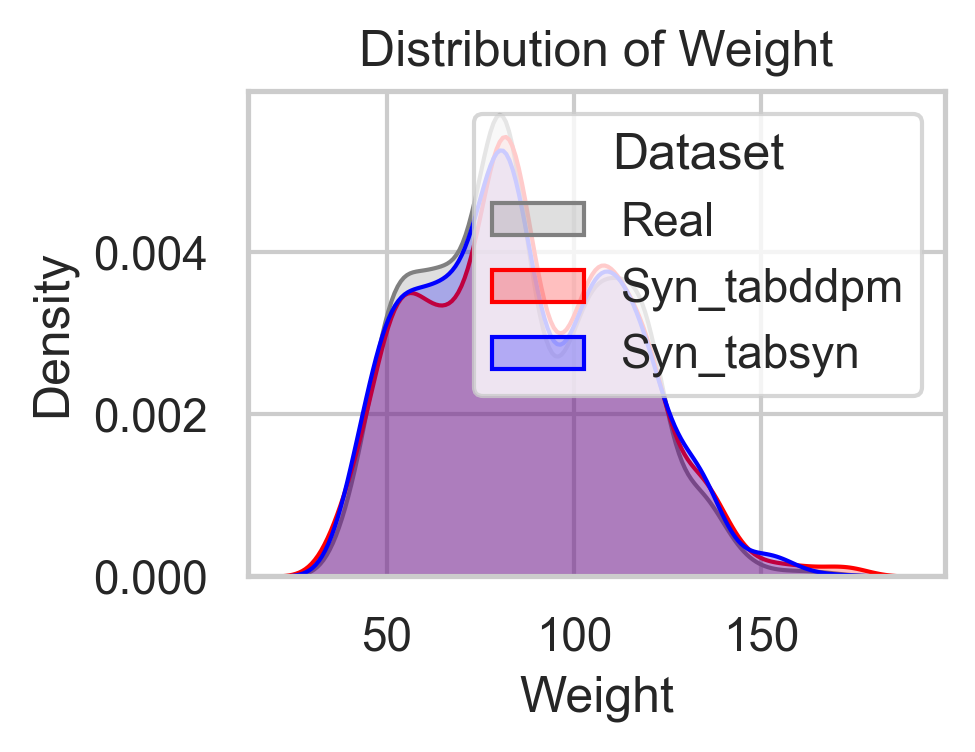

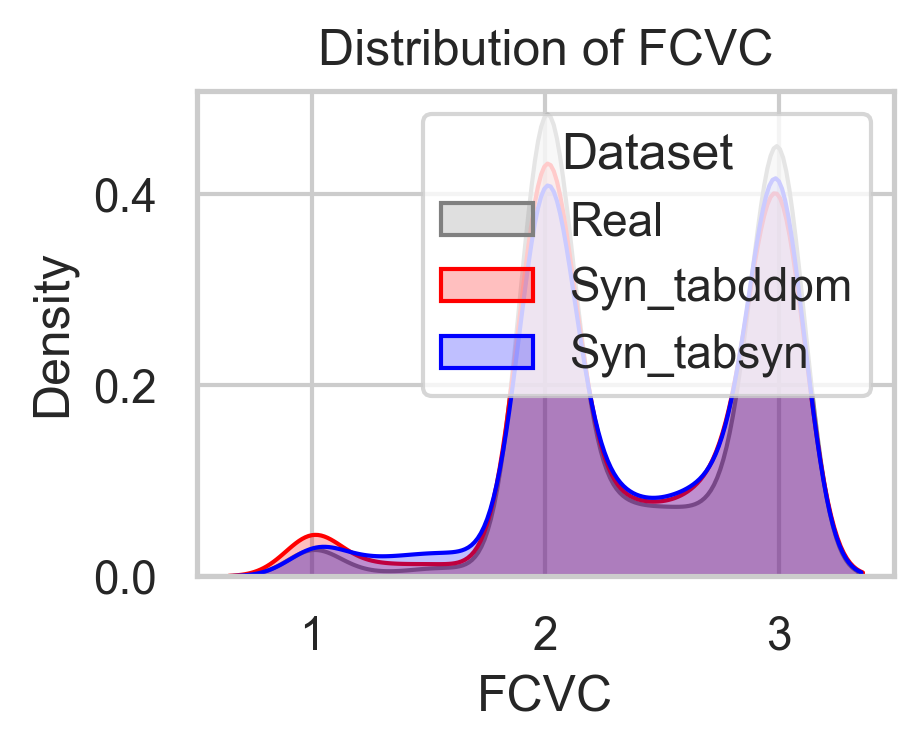

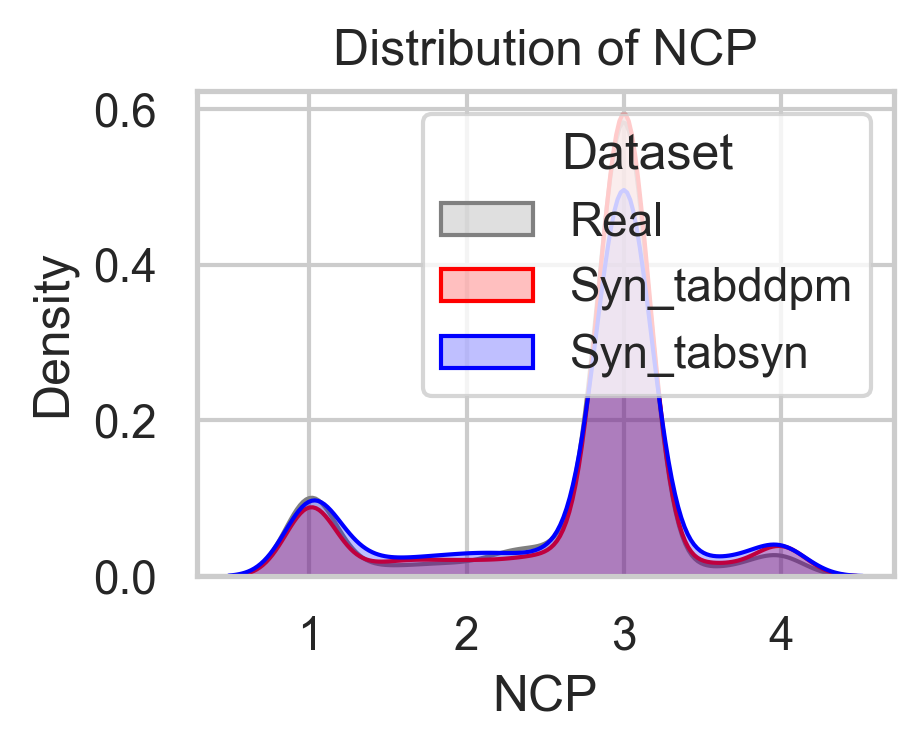

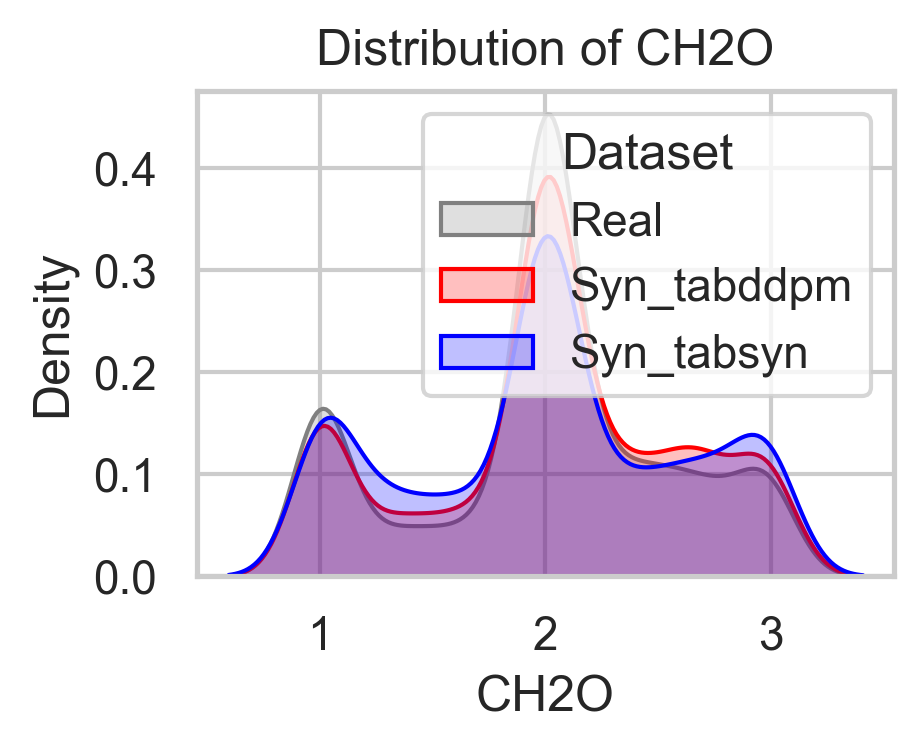

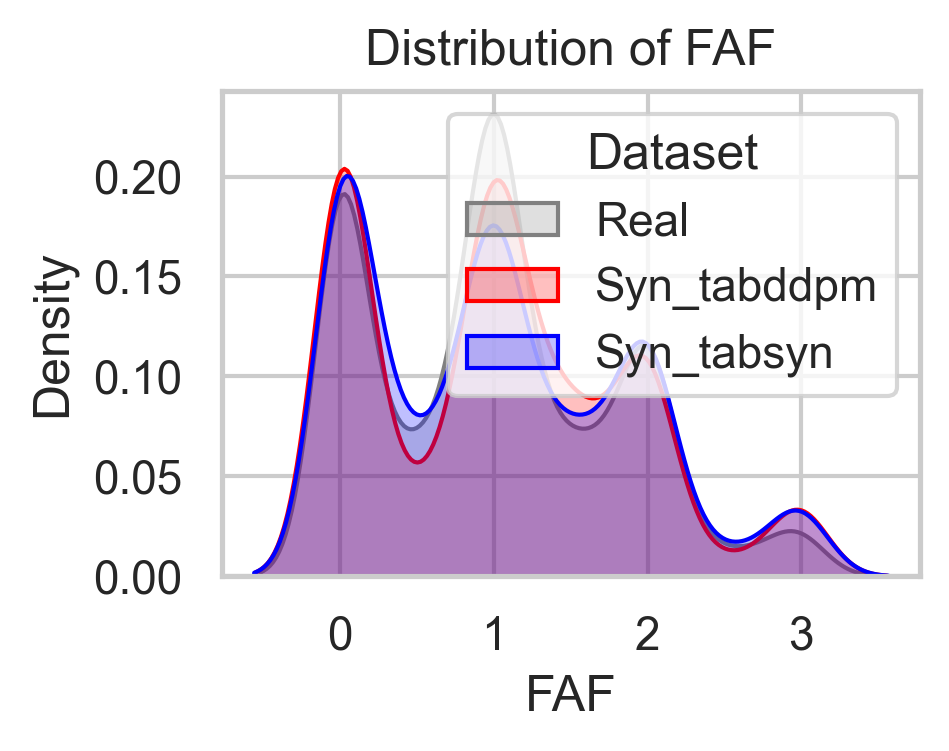

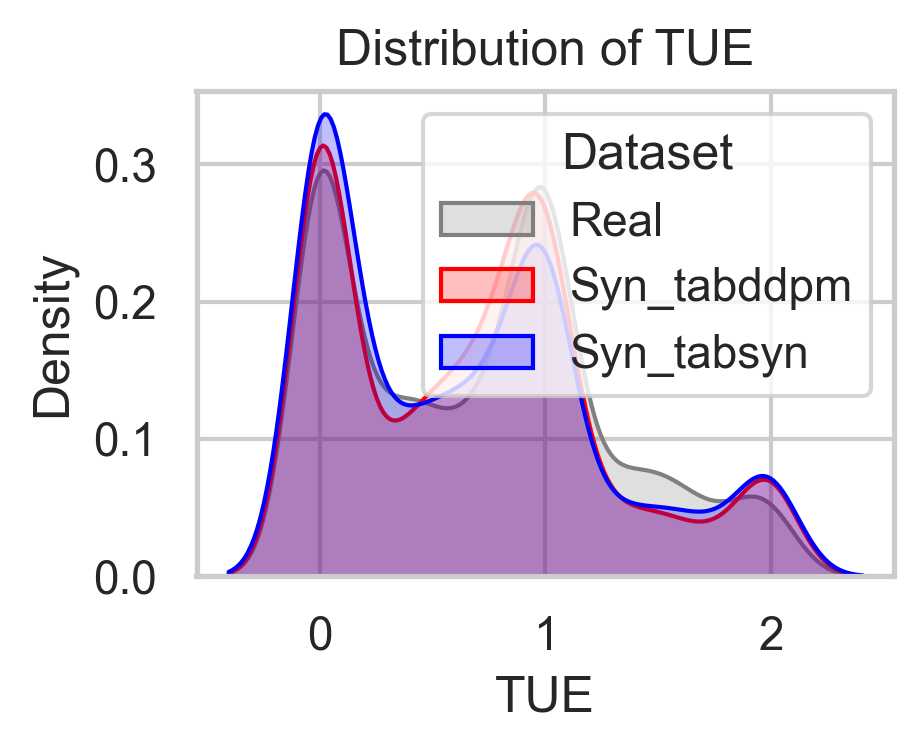

In [26]:
# Concatenate the datasets with an additional 'dataset' column
real_obesity['dataset'] = 'Real'
syn_obesity_tabddpm['dataset'] = 'Syn_tabddpm'
syn_obesity_tabsyn['dataset'] = 'Syn_tabsyn'
combined_obesity = pd.concat([real_obesity, syn_obesity_tabddpm, syn_obesity_tabsyn])

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a matrix of distribution charts for each numeric variable
for column in obesity_num:
    plt.figure(figsize=(3, 2.1),dpi=300)
    
    # Create a distribution plot for each numeric variable with different colors for real and synthetic
    sns.kdeplot(data=combined_obesity, x=column, hue='dataset', fill=True, palette=['blue', 'red', 'grey'], legend=True)#, hue_order=['Real', 'Syn_tabddpm', 'Syn_tabsyn'])
    
    plt.title(f'Distribution of {column}')
    plt.legend(title='Dataset', labels=['Real', 'Syn_tabddpm', 'Syn_tabsyn'])
    if column == 'CH2O':
        plt.savefig("dist_graph.png",dpi=300)
        plt.show()

**Results** : It depicts for "Numerical Variables" TabDDPM is peforming better as compare to TabSyn.

#### Other Metrices to evaluate the similarity for Numerical Variables

#### **Similarity Evaluation**

#### Kolmogorov Smirnov Test:
- The Kolmogorov-Smirnov test is used to decide if a sample comes from a population with a specific distribution.
- 
The Kolmogorov-Smirnov test is defined by
- 
H0:	The data follow a specified distributi
- n
H1:	The data do not follow the specified distribut
- **Interpretation of Outcomes of K-S Test:**
- 1. K-S test Statistic: **Higher value** correspond to a **lower probability** that the data originated from the *specified distribution*.
  2. p-Value : A critical value (generally 0.05) is used to evaluate the p-value and determine if we fail to reject the null hypothesis or do reject the null hypothesis.
     - If: p> critical value(0.05), we **fail** to **reject** the Null Hypothesis, therefore we assume that the data *follow the same distribution*.
     - If: p< critical value(0.05), we **reject** the null hypothesis, therefore we **cannot** assume that the data follow the specifies distribution.ion

Result of real and Tabddpm dataset (Age): KS Statistic = 0.03896787783043707, p-value = 0.11184740389491579

Result of real and Tabsyn dataset (Age): KS Statistic = 0.045813586097946286, p-value = 0.03714276778794273



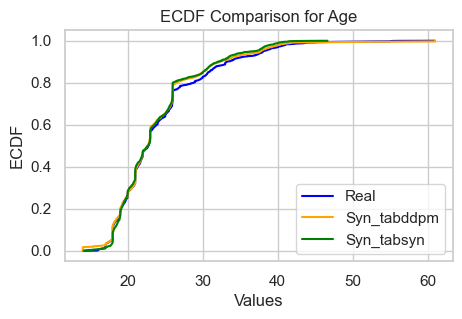

Result of real and Tabddpm dataset (Height): KS Statistic = 0.047919957872564506, p-value = 0.02552511999989269

Result of real and Tabsyn dataset (Height): KS Statistic = 0.045813586097946286, p-value = 0.03714276778794273



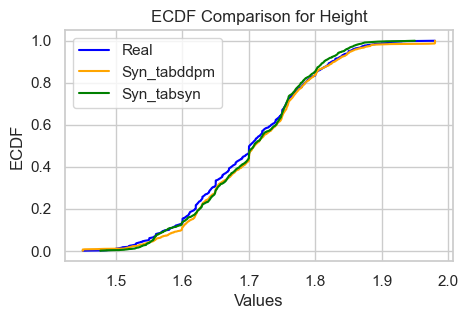

Result of real and Tabddpm dataset (Weight): KS Statistic = 0.044233807266982623, p-value = 0.04866766815728149

Result of real and Tabsyn dataset (Weight): KS Statistic = 0.031068983675618746, p-value = 0.3185993778711317



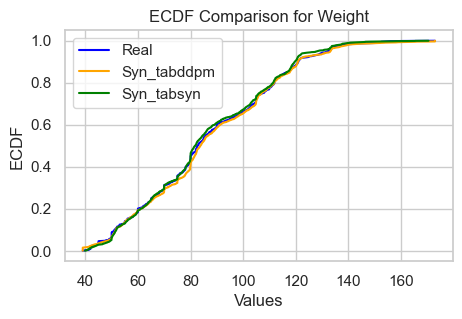

Result of real and Tabddpm dataset (FCVC): KS Statistic = 0.027909426013691417, p-value = 0.45035372097776843

Result of real and Tabsyn dataset (FCVC): KS Statistic = 0.04897314375987362, p-value = 0.021026363503776426



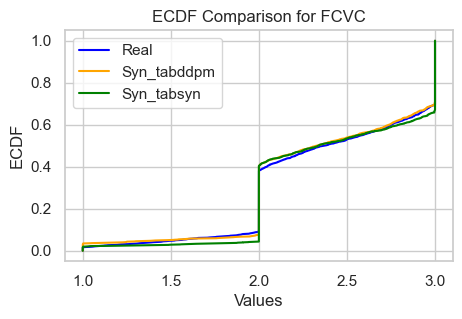

Result of real and Tabddpm dataset (NCP): KS Statistic = 0.07319641916798315, p-value = 7.578772687691086e-05

Result of real and Tabsyn dataset (NCP): KS Statistic = 0.047919957872564506, p-value = 0.02552511999989269



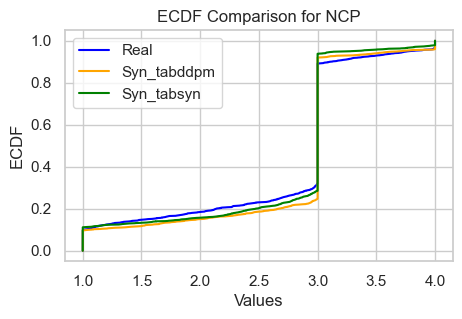

Result of real and Tabddpm dataset (CH2O): KS Statistic = 0.05476566614007372, p-value = 0.00671218292531867

Result of real and Tabsyn dataset (CH2O): KS Statistic = 0.07003686150605581, p-value = 0.0001792144576775629



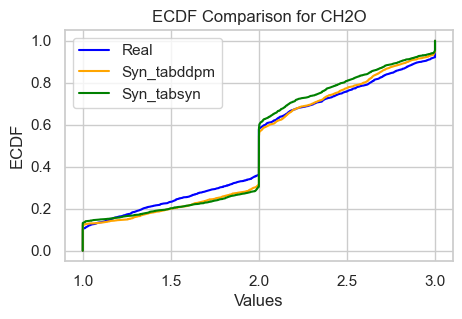

Result of real and Tabddpm dataset (FAF): KS Statistic = 0.04528699315429173, p-value = 0.040686922371504175

Result of real and Tabsyn dataset (FAF): KS Statistic = 0.03949447077409163, p-value = 0.1034087916493924



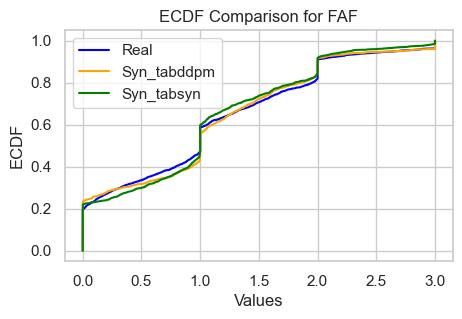

Result of real and Tabddpm dataset (TUE): KS Statistic = 0.05107951553449184, p-value = 0.014088210644915545

Result of real and Tabsyn dataset (TUE): KS Statistic = 0.06635071090047394, p-value = 0.00046615996330849494



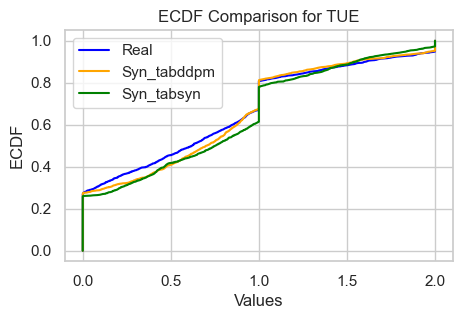

In [53]:
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# Assuming X, Y, and Z are DataFrames with 8 columns each
X = real_obesity[obesity_num]
Y = syn_obesity_tabddpm[obesity_num]
Z = syn_obesity_tabsyn[obesity_num]
columns = X.columns

for column in columns:
    x = X[column]
    y = Y[column]
    z = Z[column]

    # Perform KS test between real and Tabddpm dataset
    ks_statistic_1, p_value_1 = ks_2samp(x, y)

    # Perform KS test between real and Tabsyn dataset
    ks_statistic_2, p_value_2 = ks_2samp(x, z)

    print(f"Result of real and Tabddpm dataset ({column}): KS Statistic = {ks_statistic_1}, p-value = {p_value_1}")
    print()
    print(f"Result of real and Tabsyn dataset ({column}): KS Statistic = {ks_statistic_2}, p-value = {p_value_2}")
    print()

    # Visualize the ECDFs
    plt.figure(figsize=(5, 3))
    plt.plot(np.sort(x), np.arange(1, len(x) + 1) / len(x), label='Real', color='blue')
    plt.plot(np.sort(y), np.arange(1, len(y) + 1) / len(y), label='Syn_tabddpm', color='orange')
    plt.plot(np.sort(z), np.arange(1, len(z) + 1) / len(z), label='Syn_tabsyn', color='green')
    plt.xlabel('Values')
    plt.ylabel('ECDF')
    plt.title(f'ECDF Comparison for {column}')
    plt.legend()
    plt.show()

**Result** :
- The KS Statistic values is lower for all numerical variables, implies *higher probability* that data originated from te specified distribution.
- p-value is **higher than 0.05** for TabDDPM for variables "Age", "FCVC", "NCP", whereas it is **higher than 0.05** for TabSyn for variables "FAF", "weight".
- This Implies, Overall TabDDPM is performing better in comaprison to TabSyn in order to preserve the distribution of the numerical variables.

### Chi- Square for Categorical Variables:
This test is used to determine whether the association between two qualitative variables is 
statistically significan, with the following hypothesis:
- Null Hypothesis(H0): There is no significant association between the two variables.
- Alternate Hypothesis(H1): There is a significant association between two variables.
- **Interpretation of the Results:**
- P-value ≤ α implies Reject H0.
- P-value > α implies Fail to Reject H0.,

In [33]:
### Chi square for real dataset and dataset generated by Tabddpm
from scipy.stats import chi2_contingency
#list of categorical columns i.e. obesity_cat

def perform_chi_squared_test(dataframe1, dataframe2, column):
    # Create a contingency table
    contingency_table = pd.crosstab(dataframe1[column], dataframe2[column])

    # Perform the chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    print(f"Chi-Squared Test for '{column}':")
    print(f"Chi-Squared Statistic: {chi2}")
    print(f"P-value: {p}")
    print("")

# Perform the chi-squared test for each common categorical column for datasets real_adult and syn_adult_tabddpm
for column in obesity_cat:
    perform_chi_squared_test(real_obesity, syn_obesity_tabddpm, column)

Chi-Squared Test for 'Gender':
Chi-Squared Statistic: 5.54240767786858
P-value: 0.018561029267868966

Chi-Squared Test for 'family_history_with_overweight':
Chi-Squared Statistic: 0.8407559747250227
P-value: 0.359180651165369

Chi-Squared Test for 'FAVC':
Chi-Squared Statistic: 0.014553464694208255
P-value: 0.9039779736811594

Chi-Squared Test for 'CAEC':
Chi-Squared Statistic: 11.340526450949323
P-value: 0.25308772119014367

Chi-Squared Test for 'SMOKE':
Chi-Squared Statistic: 0.0008604230940156007
P-value: 0.9765990324275278

Chi-Squared Test for 'SCC':
Chi-Squared Statistic: 0.7755130913561032
P-value: 0.37851691837015133

Chi-Squared Test for 'CALC':
Chi-Squared Statistic: 4.603286663347599
P-value: 0.5956030863867039

Chi-Squared Test for 'MTRANS':
Chi-Squared Statistic: 9.76282977543617
P-value: 0.8787168383873543

Chi-Squared Test for 'NObeyesdad':
Chi-Squared Statistic: 41.04363596241567
P-value: 0.25897663333201537



**Results** :
- Chi square test between *"Real"* and *"Synthetic data by TabDDPM"*
- For all teh variables except "Gender", the p-values is less than critical value (0.05), hence we are fail to rejct the Null hypothesis, therefoe there is no significant assosiation between the variables.
  

In [34]:
### Chi square for real dataset and dataset generated by Tabsyn
from scipy.stats import chi2_contingency
#list of categorical columns i.e. obesity_cat

def perform_chi_squared_test(dataframe1, dataframe2, column):
    # Create a contingency table
    contingency_table = pd.crosstab(dataframe1[column], dataframe2[column])

    # Perform the chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    print(f"Chi-Squared Test for '{column}':")
    print(f"Chi-Squared Statistic: {chi2}")
    print(f"P-value: {p}")
    print("")

# Perform the chi-squared test for each common categorical column for datasets real_adult and syn_adult_tabddpm
for column in obesity_cat:
    perform_chi_squared_test(real_obesity, syn_obesity_tabsyn, column)

Chi-Squared Test for 'Gender':
Chi-Squared Statistic: 3.58394350784177
P-value: 0.05834050234292113

Chi-Squared Test for 'family_history_with_overweight':
Chi-Squared Statistic: 0.0
P-value: 1.0

Chi-Squared Test for 'FAVC':
Chi-Squared Statistic: 0.9699220030111494
P-value: 0.3246996318905344

Chi-Squared Test for 'CAEC':
Chi-Squared Statistic: 6.3898551287262295
P-value: 0.7003542908107445

Chi-Squared Test for 'SMOKE':
Chi-Squared Statistic: 0.0
P-value: 1.0

Chi-Squared Test for 'SCC':
Chi-Squared Statistic: 0.009062802078536238
P-value: 0.9241569625136016

Chi-Squared Test for 'CALC':
Chi-Squared Statistic: 13.678743063562633
P-value: 0.1342206295968426

Chi-Squared Test for 'MTRANS':
Chi-Squared Statistic: 7.264858927093359
P-value: 0.8396256728650516

Chi-Squared Test for 'NObeyesdad':
Chi-Squared Statistic: 40.55312823734025
P-value: 0.2764628983768427



**Results** :
- Chi square test between *"Real"* and *"Synthetic data by TabSyn"*
- For all teh variables except "Gender", the p-values is less than critical value (0.05), hence we are fail to rejct the Null hypothesis, therefoe there is no significant assosiation between the variables.

### Wasserstein Distance

Wasserstein Distance between real_Age and syn_Age: 0.4146491240126382


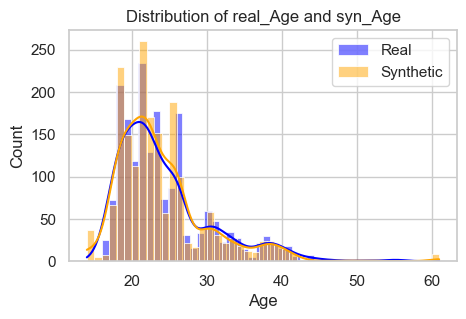

Wasserstein Distance between real_Height and syn_Height: 0.008473149921011058


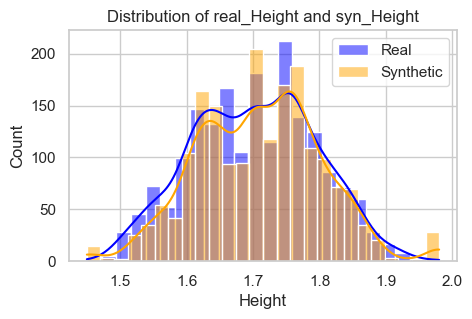

Wasserstein Distance between real_Weight and syn_Weight: 0.9404590179041603


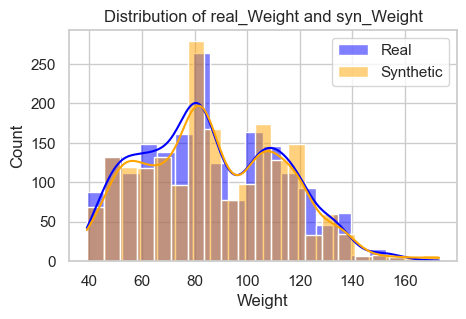

Wasserstein Distance between real_FCVC and syn_FCVC: 0.019558210163243814


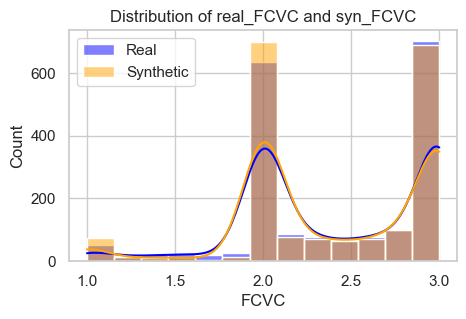

Wasserstein Distance between real_NCP and syn_NCP: 0.08298126771985255


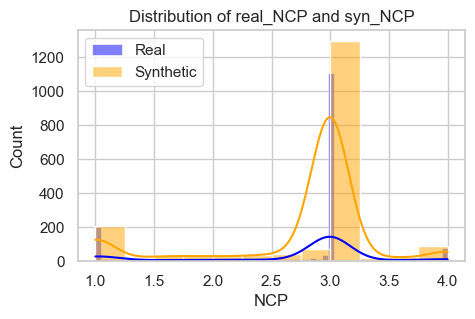

Wasserstein Distance between real_CH2O and syn_CH2O: 0.047173910531858876


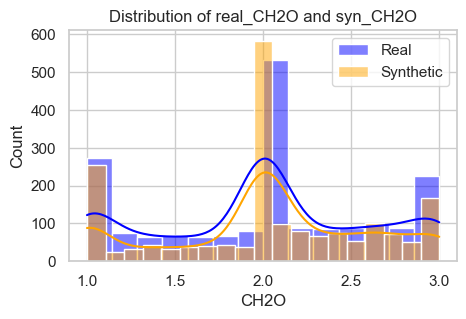

Wasserstein Distance between real_FAF and syn_FAF: 0.040315182606103214


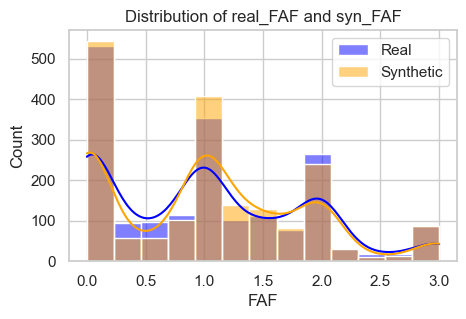

Wasserstein Distance between real_TUE and syn_TUE: 0.03909614395528172


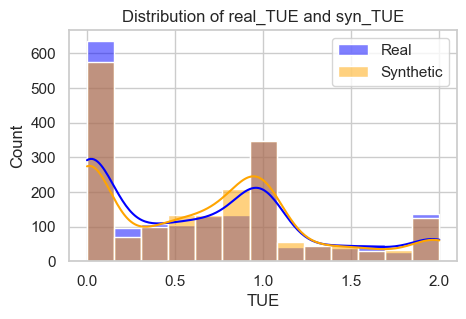

In [35]:
## Wasserstein distance between real dataset and synthetic dataset generated by Tabddpm
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt

def calculate_and_visualize_wasserstein(dataset1, dataset2):
    columns = obesity_num

    for var in columns:
            distance = wasserstein_distance(dataset1[var], dataset2[var])
            print(f"Wasserstein Distance between real_{var} and syn_{var}: {distance}")

            # Visualize the distributions
            plt.figure(figsize=(5, 3))
            sns.histplot(dataset1[var], label='Real', kde=True, color='blue')
            sns.histplot(dataset2[var], label='Synthetic', kde=True, color='orange')
            plt.title(f'Distribution of real_{var} and syn_{var}')
            plt.legend()
            plt.show()

calculate_and_visualize_wasserstein(real_obesity, syn_obesity_tabddpm)

Wasserstein Distance between real_Age and syn_Age: 0.5716457388098999


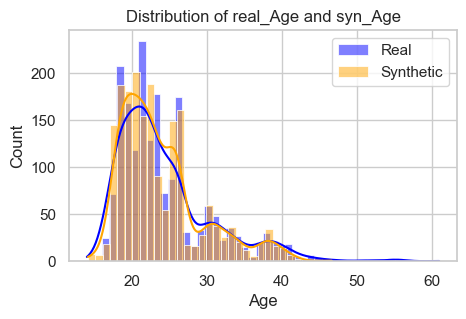

Wasserstein Distance between real_Height and syn_Height: 0.007700176513954717


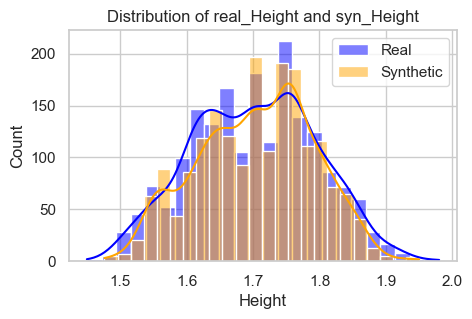

Wasserstein Distance between real_Weight and syn_Weight: 1.0566996587677724


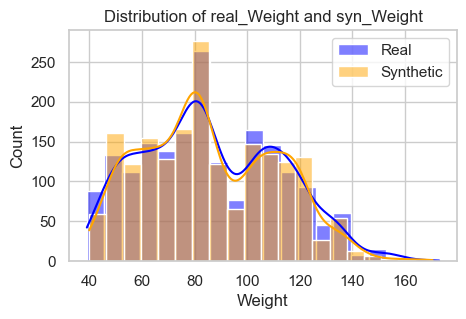

Wasserstein Distance between real_FCVC and syn_FCVC: 0.03248341569246972


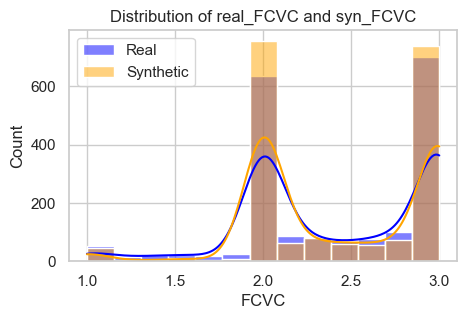

Wasserstein Distance between real_NCP and syn_NCP: 0.0718088727751448


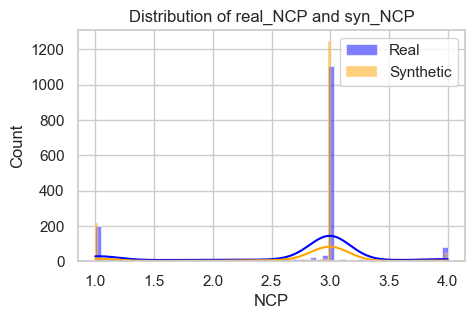

Wasserstein Distance between real_CH2O and syn_CH2O: 0.07479743944181148


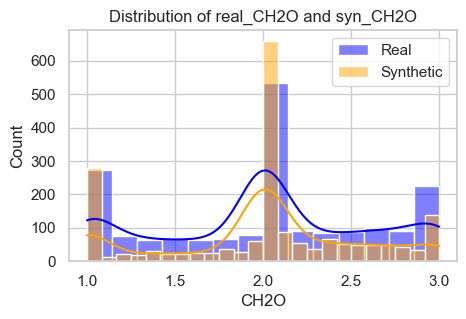

Wasserstein Distance between real_FAF and syn_FAF: 0.07380925715921538


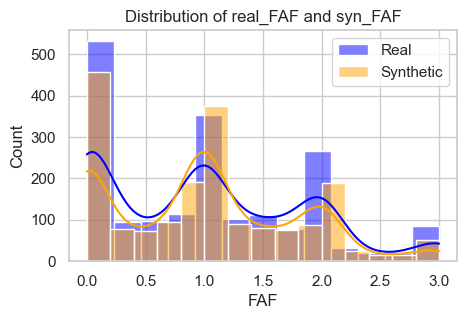

Wasserstein Distance between real_TUE and syn_TUE: 0.06670035111875197


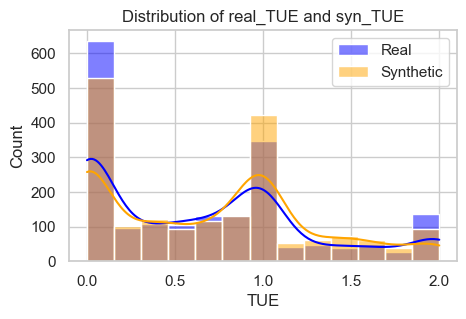

In [36]:
## ## Wasserstein distance between real dataset and synthetic dataset generated by Tabsyn

calculate_and_visualize_wasserstein(real_obesity, syn_obesity_tabsyn)

### Privacy Preservation Measures

#### Density estimation of single column and pair-wise correlation

In [38]:
!python eval/eval_density.py --dataname obesity --model tabddpm --path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\obesity\tabddpm.csv

C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\obesity\tabddpm.csv
Generating report ...

(1/2) Evaluating Column Shapes: : 100%|##########| 17/17 [00:00<00:00, 684.55it/s]

(2/2) Evaluating Column Pair Trends: : 100%|##########| 136/136 [00:02<00:00, 60.77it/s]

Overall Quality Score: 95.36%

Properties:
- Column Shapes: 96.37%
- Column Pair Trends: 94.35%
Generating report ...

(1/3) Evaluating Coverage: : 100%|##########| 17/17 [00:00<00:00, 1351.98it/s]

(2/3) Evaluating Boundary: : 100%|##########| 17/17 [00:00<00:00, 2056.15it/s]

(3/3) Evaluating Synthesis: : 100%|##########| 1/1 [00:00<?, ?it/s]

Diagnostic Results:

SUCCESS:


Traceback (most recent call last):
  File "C:\Users\neetu\Documents\Untitled_Folder\tabsyn\eval\eval_density.py", line 99, in <module>
    diag_report.generate(new_real_data, new_syn_data, metadata)
  File "C:\Users\neetu\anaconda3\envs\tab\lib\site-packages\sdmetrics\reports\base_report.py", line 155, in generate
    self._handle_results(verbose)
  File "C:\Users\neetu\anaconda3\envs\tab\lib\site-packages\sdmetrics\reports\single_table\diagnostic_report.py", line 29, in _handle_results
    self._results_handler.print_results(self._properties, verbose)
  File "C:\Users\neetu\anaconda3\envs\tab\lib\site-packages\sdmetrics\reports\_results_handler.py", line 149, in print_results
    self._print_results_for_level('SUCCESS')
  File "C:\Users\neetu\anaconda3\envs\tab\lib\site-packages\sdmetrics\reports\_results_handler.py", line 117, in _print_results_for_level
    sys.stdout.write(f'{level_marks[level]} {result}\n')
  File "C:\Users\neetu\anaconda3\envs\tab\lib\encodings\cp1252.py", line 1

Saving scores to  eval/mle/obesity/tabddpm.json


In [39]:
!python eval/eval_density.py --dataname obesity --model tabsyn --path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\obesity\tabsyn.csv

C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\obesity\tabsyn.csv
Generating report ...

(1/2) Evaluating Column Shapes: : 100%|##########| 17/17 [00:00<00:00, 1192.90it/s]

(2/2) Evaluating Column Pair Trends: : 100%|##########| 136/136 [00:02<00:00, 67.25it/s]

Overall Quality Score: 94.68%

Properties:
- Column Shapes: 96.84%
- Column Pair Trends: 92.52%
Generating report ...

(1/3) Evaluating Coverage: : 100%|##########| 17/17 [00:00<00:00, 2548.09it/s]

(2/3) Evaluating Boundary: : 100%|##########| 17/17 [00:00<00:00, 1862.04it/s]

(3/3) Evaluating Synthesis: : 100%|##########| 1/1 [00:00<00:00, 212.75it/s]

Diagnostic Results:

SUCCESS:


Traceback (most recent call last):
  File "C:\Users\neetu\Documents\Untitled_Folder\tabsyn\eval\eval_density.py", line 99, in <module>
    diag_report.generate(new_real_data, new_syn_data, metadata)
  File "C:\Users\neetu\anaconda3\envs\tab\lib\site-packages\sdmetrics\reports\base_report.py", line 155, in generate
    self._handle_results(verbose)
  File "C:\Users\neetu\anaconda3\envs\tab\lib\site-packages\sdmetrics\reports\single_table\diagnostic_report.py", line 29, in _handle_results
    self._results_handler.print_results(self._properties, verbose)
  File "C:\Users\neetu\anaconda3\envs\tab\lib\site-packages\sdmetrics\reports\_results_handler.py", line 149, in print_results
    self._print_results_for_level('SUCCESS')
  File "C:\Users\neetu\anaconda3\envs\tab\lib\site-packages\sdmetrics\reports\_results_handler.py", line 117, in _print_results_for_level
    sys.stdout.write(f'{level_marks[level]} {result}\n')
  File "C:\Users\neetu\anaconda3\envs\tab\lib\encodings\cp1252.py", line 1

**Results**:
- Comparison between the column shapes, Column Pair Trends and Overall Quality Scores between Real dataet with TabDDPM and TabSyn:
    |Metrices| TabDDPM                        | TabSyn                        |
| ------------|------------------- | ----------------------------- |
|  Overall Quality Score:| 95.36% |  94.68% |
|  Column Shapes: |96.37%                  |  96.84%                |
|Column Pair Trends: |   94.35% | 92.52%   |

#### Alpha Precision and Beta Recall
- 1. Alpha -preicison: the fidelity of synthetic data
- 2. Beta -recall: the diversity of synthetic data

In [40]:
!python eval/eval_quality.py --dataname obesity --model tabddpm --path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\obesity\tabddpm.csv

[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode
C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\obesity\tabddpm.csv
=========== All Features ===========
Data shape:  (1899, 38)
alpha precision: 0.897209, beta recall: 0.380305


**Interpretation** : 
- **α-Precision**: It evaluates the fidelity of synthetic data – whether each synthetic example comes from the real-data distribution.
- **β-Recall**: It evaluates the coverage of the synthetic data, e.g., whether the synthetic data can cover the entire distribution of the real data (In other words, whether a real data sample is close to the synthetic data).

In [41]:
!python eval/eval_quality.py --dataname obesity --model tabsyn --path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\obesity\tabsyn.csv

[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode
C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\obesity\tabsyn.csv
=========== All Features ===========
Data shape:  (1899, 38)
alpha precision: 0.975135, beta recall: 0.303774


**Result** : 
| TabDDPM                        | TabSyn                        |
| ------------------------------- | ----------------------------- |
|  alpha precision: 0.897209 | alpha precision: 0.975135 |
|    - beta recall: 0.380305                  | beta recall: 0.303774                   |

- This implies the TabSyn is performing better in regards of overall Fidelity of the synthetic dataset.
- There is no significant implication from this result.

#### Machine Learning Efficiency

In [42]:
!python eval/eval_mle.py --dataname obesity --model tabddpm --path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\obesity\tabddpm.csv

Saving scores to  eval/mle/obesity/tabddpm.json



100%|##########| 12/12 [00:23<00:00,  1.99s/it]

100%|##########| 48/48 [00:00<00:00, 52.31it/s]

100%|##########| 36/36 [00:10<00:00,  3.58it/s]

100%|##########| 36/36 [00:26<00:00,  1.38it/s]


**Results**:  
- *Macro F1 Score* : This is the average F1 score across all classes. It indicates the model's ability to correctly classify instances across all classes, regardless of class imbalance.
- *ROC AUC Score* : ROC AUC (Receiver Operating Characteristic Area Under Curve) measures the model's ability to distinguish between classes. A higher ROC AUC score indicates better performance.
- *Weighted F1 score*: Weighted F1 score takes class imbalance into account. It is the weighted average of the F1 score for each class, weighted by the number of true instances for each class.
- *Accuracy* : Accuracy is the proportion of correctly classified instances out of the total instances. It measures overall correctness of the model's predictions.

In [43]:
!python eval/eval_mle.py --dataname obesity --model tabsyn --path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\obesity\tabsyn.csv

Saving scores to  eval/mle/obesity/tabsyn.json



100%|##########| 12/12 [00:28<00:00,  2.40s/it]

100%|##########| 48/48 [00:00<00:00, 51.96it/s]

100%|##########| 36/36 [00:09<00:00,  3.67it/s]

100%|##########| 36/36 [00:27<00:00,  1.29it/s]


|TabDDPM                                 | TabSyn                                        |
|----------------------------------------|-----------------------------------------------|
|- **MLP Classifier**                        |- **MLP Classifier**                             |
|1. macro_f1 0.8146198985565017           | 0.7525750692485661                           |
|2. roc_auc 0.9739534648027642            | 0.9665331476362474                           |
|3. weighted_f1 0.8139588156461796        | 0.7515940168312384                           |
|4. accuracy 0.8160377358490566           | 0.7594339622641509                           |
|- **Decision Tree Classifier**              | - **Decision Tree Classifier**                   |
|1. macro_f1 0.8729493610437291           | 0.8651324406126575                           |
|2. roc_auc 0.9665399460808125            | 0.9601796454060194                           |
|3. weighted_f1 0.871683734132635         | 0.8642340797660581                           |
|4. accuracy 0.8820754716981132           | 0.8726415094339622                           |
|- **Random Forest Classifier**              | - **Random Forest Classifier**                   |
|1. macro_f1 0.922397469604989            | 0.9044177309163098                           |
|2. roc_auc 0.9937988949688771            | 0.9934469096447458                           |
|3. weighted_f1 0.9216248332901418        | 0.9034478211753625                           |
|4. accuracy 0.9245283018867925           | 0.910377358490566                            |
|- **XGB Classifier**                        | - **XGB Classifier**                              |
|1. macro_f1 0.951401567008806            | 0.9555618574212531                           |
|2. roc_auc 0.9981387967007669            | 0.9974997291794274                           |
|3. weighted_f1 0.9511205234832854        | 0.9551937603476434                           |
|4. accuracy 0.9528301886792453           | 0.9575471698113207                           |

- As per the results by both generated datasets, TabDDPM is working better than TabSyn.

#### Privacy protection: Distance to Closest Record (DCR)

In [64]:
!python eval/eval_dcr.py --dataname obesity --model tabddpm --path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\obesity\tabddpm.csv

DCR Score, a value closer to 0.5 is better
obesity-tabddpm, DCR Score = 0.9304897314375987


In [65]:
!python eval/eval_dcr.py --dataname obesity --model tabsyn --path C:\Users\neetu\Documents\Untitled_Folder\tabsyn\synthetic\obesity\tabsyn.csv

DCR Score, a value closer to 0.5 is better
obesity-tabsyn, DCR Score = 0.9173249078462349


**INTERPRETATION** : The output of the code implies the proportion of instances where the DCR for the real data is less than the DCR for the test data, relative to the total number of DCR values calculated for the real data. This proportion provides an indication of how closely the synthetic data matches the distribution of the real data compared to the test data. A higher score suggests a better match between the synthetic and real data distributions.

**Results** : For both the models, the value for DCR is high this **implies** the synthetic data and real data are highly similar which further implier teh loss of the privacy.

#### Detection: Classifier Two Sample Tests (C2ST)

In [46]:
!python eval/eval_detection.py --dataname obesity --model tabddpm

synthetic/obesity/tabddpm.csv
obesity, tabddpm: 0.9096248378834124


In [47]:
!python eval/eval_detection.py --dataname obesity --model tabsyn

synthetic/obesity/tabsyn.csv
obesity, tabsyn: 0.902791608121677


**Interpretation** : This test estimates if a target is predictable from features by comparing the loss of a classifier learning 
the true target with the distribution of losses of classifiers learning a random target with the same average.  
The null hypothesis is that the target is independent of the features - therefore the loss a classifier learning to predict the target should not be different from the one of a classifier learning independent, random noise.

**Results** : The value for C2ST for both the models are approximatly similar and high.

### Conclusion:

- For the dataset "Obesity" with around 2111 entries, both the Models TabDDPM and TabSyn are performing similar.
- It does not provides any significant outcomes from our above metrices.
- It seems with the small amount of the dataset we are not able to train the model effectively.
- Hence, took a large dataset "diabetes" with 253680 entries.